## Data Preprocessing steps:

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('companies.csv')

In [3]:
data

id  Unnamed: 0.1 entity_type  entity_id  parent_id  \
0           c:1             0     Company          1        NaN   
1          c:10             1     Company         10        NaN   
2         c:100             2     Company        100        NaN   
3       c:10000             3     Company      10000        NaN   
4       c:10001             4     Company      10001        NaN   
...         ...           ...         ...        ...        ...   
196548  c:99940        196548     Company      99940        NaN   
196549   c:9995        196549     Company       9995        NaN   
196550   c:9996        196550     Company       9996        NaN   
196551   c:9997        196551     Company       9997        NaN   
196552   c:9998        196552     Company       9998        NaN   

                      name     normalized_name                    permalink  \
0                 Wetpaint            wetpaint            /company/wetpaint   
1                  Flektor             flektor             /company/flektor   
2                    There               there               /company/there   
3                  MYWEBBO             mywebbo             /company/mywebbo   
4       THE Movie Streamer  the movie streamer  /company/the-movie-streamer   
...                    ...                 ...                          ...   
196548           Webgility           webgility           /company/webgility   
196549              FohBoh              fohboh              /company/fohboh   
196550                 CSC                 csc                 /company/csc   
196551       Top-candidate       top candidate       /company/top-candidate   
196552      Closet Couture      closet couture      /company/closet-couture   

           category_code     status  ... first_milestone_at last_milestone_at  \
0                    web  operating  ...         2010-09-05        2013-09-18   
1            games_video   acquired  ...                NaN               NaN   
2            games_video   acquired  ...         2003-02-01        2011-09-23   
3        network_hosting  operating  ...                NaN               NaN   
4            games_video  operating  ...                NaN               NaN   
...                  ...        ...  ...                ...               ...   
196548         ecommerce  operating  ...         2013-08-12        2013-08-12   
196549  public_relations  operating  ...         2013-05-01        2013-05-01   
196550        consulting  operating  ...         2012-01-01        2013-10-30   
196551            search  operating  ...                NaN               NaN   
196552         ecommerce  operating  ...         2006-07-01        2008-09-10   

       milestones relationships        created_by           created_at  \
0             5.0          17.0  initial-importer  2007-05-25 06:51:27   
1             NaN           6.0  initial-importer  2007-05-31 21:11:51   
2             4.0          12.0  initial-importer  2007-08-06 23:52:45   
3             NaN           NaN               NaN  2008-08-24 16:51:57   
4             NaN           NaN               NaN  2008-08-24 17:10:34   
...           ...           ...               ...                  ...   
196548        2.0           5.0               NaN  2011-09-06 23:17:56   
196549        1.0          14.0               NaN  2008-08-24 15:46:26   
196550        3.0          44.0               NaN  2008-08-24 15:46:58   
196551        NaN           1.0               NaN  2008-08-24 16:00:22   
196552        2.0           1.0               NaN  2008-08-24 16:46:13   

                 updated_at        lat         lng   ROI  
0       2013-04-13 03:29:00  47.606209 -122.332071  15.5  
1       2008-05-23 23:23:14  34.021122 -118.396467   NaN  
2       2013-11-04 02:09:48  37.562992 -122.325525   NaN  
3       2008-09-06 14:19:18        NaN         NaN   NaN  
4       2008-09-06 14:19:18        NaN         NaN   NaN  
...                     ...        ...     

In [4]:
data.head() # Display the first few rows of the dataset

id  Unnamed: 0.1 entity_type  entity_id  parent_id  \
0      c:1             0     Company          1        NaN   
1     c:10             1     Company         10        NaN   
2    c:100             2     Company        100        NaN   
3  c:10000             3     Company      10000        NaN   
4  c:10001             4     Company      10001        NaN   

                 name     normalized_name                    permalink  \
0            Wetpaint            wetpaint            /company/wetpaint   
1             Flektor             flektor             /company/flektor   
2               There               there               /company/there   
3             MYWEBBO             mywebbo             /company/mywebbo   
4  THE Movie Streamer  the movie streamer  /company/the-movie-streamer   

     category_code     status  ... first_milestone_at last_milestone_at  \
0              web  operating  ...         2010-09-05        2013-09-18   
1      games_video   acquired  ...                NaN               NaN   
2      games_video   acquired  ...         2003-02-01        2011-09-23   
3  network_hosting  operating  ...                NaN               NaN   
4      games_video  operating  ...                NaN               NaN   

  milestones relationships        created_by           created_at  \
0        5.0          17.0  initial-importer  2007-05-25 06:51:27   
1        NaN           6.0  initial-importer  2007-05-31 21:11:51   
2        4.0          12.0  initial-importer  2007-08-06 23:52:45   
3        NaN           NaN               NaN  2008-08-24 16:51:57   
4        NaN           NaN               NaN  2008-08-24 17:10:34   

            updated_at        lat         lng   ROI  
0  2013-04-13 03:29:00  47.606209 -122.332071  15.5  
1  2008-05-23 23:23:14  34.021122 -118.396467   NaN  
2  2013-11-04 02:09:48  37.562992 -122.325525   NaN  
3  2008-09-06 14:19:18        NaN         NaN   NaN  
4  2008-09-06 14:19:18        NaN         NaN   NaN  

[5 rows x 44 columns]

In [5]:
data.describe() # Get summary statistics for numerical columns (mean, median, quartiles, etc.)

Unnamed: 0.1      entity_id  parent_id     logo_width    logo_height  \
count  196553.000000  196553.000000        0.0  110110.000000  110110.000000   
mean    98276.000000  153006.227333        NaN     459.132685     222.728917   
std     56740.108067   90209.250941        NaN     594.982577     333.090722   
min         0.000000       1.000000        NaN       1.000000       1.000000   
25%     49138.000000   59850.000000        NaN     192.000000      70.000000   
50%     98276.000000  174539.000000        NaN     267.000000     105.000000   
75%    147414.000000  232655.000000        NaN     484.000000     232.000000   
max    196552.000000  286215.000000        NaN   18200.000000    9600.000000   

       investment_rounds  invested_companies  funding_rounds  \
count        2591.000000         2591.000000    31707.000000   
mean            2.372057            2.204940        1.659760   
std            12.173510           11.436955        1.201666   
min             1.000000            1.000000        1.000000   
25%             1.000000            1.000000        1.000000   
50%             1.000000            1.000000        1.000000   
75%             1.000000            1.000000        2.000000   
max           478.000000          459.000000       15.000000   

       funding_total_usd    milestones  relationships           lat  \
count       2.787400e+04  91699.000000  129667.000000  83852.000000   
mean        1.481652e+07      1.199402       2.852067     37.564512   
std         6.775937e+07      0.540099       9.100309     15.477102   
min         2.910000e+02      1.000000       1.000000    -50.942326   
25%         5.000000e+05      1.000000       1.000000     34.052234   
50%         2.564500e+06      1.000000       1.000000     39.768403   
75%         1.100000e+07      1.000000       3.000000     45.421530   
max         5.700000e+09      9.000000    1189.000000     77.553604   

                lng           ROI  
count  83852.000000    726.000000  
mean     -52.123066     45.745037  
std       70.049067    572.035638  
min     -159.497746      0.011111  
25%     -111.940005      2.648879  
50%      -77.036871      6.500497  
75%       -0.127758     13.549900  
max      176.212549  13333.333333

In [6]:
data.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum() #identify missing values
     

id                          0
Unnamed: 0.1                0
entity_type                 0
entity_id                   0
parent_id              196553
name                       22
normalized_name            26
permalink                   0
category_code           73367
status                      0
founded_at             105326
closed_at              193933
domain                  70008
homepage_url            70008
twitter_username       115962
logo_url                86443
logo_width              86443
logo_height             86443
short_description      189422
description            104505
overview                69582
tag_list               115101
country_code           108563
state_code             145650
city                   112663
region                      0
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
invested_companies     193962
first_funding_at       165046
last_funding_at        165046
funding_rounds         164846
funding_to

# A. Data Cleaning
### 1. Delete irrelevant & redundant information.
### 2. Remove noise or unreliable data (missing values and outliers). 

1.a. Delete 'region','city' as they provide too much of granularity.

In [9]:
# Drop entire columns that are irrelevant or redundant for the analysis.
data.drop(['region','city','state_code'], axis=1, inplace=True)

1b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.


In [10]:
data.drop(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at'], axis=1, inplace=True)

1c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies' as they are irrelevant features.

In [11]:
data.drop(['domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies'], axis=1, inplace=True)

In [12]:
data.columns

Index(['category_code', 'status', 'founded_at', 'closed_at', 'country_code',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'lat', 'lng', 'ROI'],
      dtype='object')

1d. Delete duplicate values if found any.

In [13]:
# Check for duplicate
duplicates = data[data.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")
duplicates

Number of duplicate rows: 87089


category_code     status founded_at closed_at country_code  \
79               NaN  operating        NaN       NaN          NaN   
114              NaN  operating        NaN       NaN          NaN   
124              NaN   acquired        NaN       NaN          NaN   
126              NaN  operating        NaN       NaN          NaN   
132              NaN   acquired        NaN       NaN          NaN   
...              ...        ...        ...       ...          ...   
196533           NaN  operating        NaN       NaN          NaN   
196534           NaN  operating        NaN       NaN          NaN   
196535           NaN  operating        NaN       NaN          NaN   
196536           NaN  operating        NaN       NaN          NaN   
196546           NaN  operating        NaN       NaN          NaN   

       first_investment_at last_investment_at  investment_rounds  \
79                     NaN                NaN                NaN   
114                    NaN                NaN                NaN   
124                    NaN                NaN                NaN   
126                    NaN                NaN                NaN   
132                    NaN                NaN                NaN   
...                    ...                ...                ...   
196533                 NaN                NaN                NaN   
196534                 NaN                NaN                NaN   
196535                 NaN                NaN                NaN   
196536                 NaN                NaN                NaN   
196546                 NaN                NaN                NaN   

       first_funding_at last_funding_at  funding_rounds  funding_total_usd  \
79                  NaN             NaN             NaN                NaN   
114                 NaN             NaN             NaN                NaN   
124                 NaN             NaN             NaN                NaN   
126                 NaN             NaN             NaN                NaN   
132                 NaN             NaN             NaN                NaN   
...                 ...             ...             ...                ...   
196533              NaN             NaN             NaN                NaN   
196534              NaN             NaN             NaN                NaN   
196535              NaN             NaN             NaN                NaN   
196536              NaN             NaN             NaN                NaN   
196546              NaN             NaN             NaN                NaN   

       first_milestone_at last_milestone_at  milestones  relationships  lat  \
79                    NaN               NaN         NaN            1.0  NaN   
114                   NaN               NaN         NaN            NaN  NaN   
124                   NaN               NaN         NaN            NaN  NaN   
126                   NaN               NaN         NaN            1.0  NaN   
132                   NaN               NaN         NaN            NaN  NaN   
...                   ...               ...         ...            ...  ...   
196533                NaN               NaN         NaN            NaN  NaN   
196534                NaN               NaN         NaN            NaN  NaN   
196535                NaN               NaN         NaN            NaN  NaN   
196536                NaN               NaN         NaN            NaN  NaN   
196546                NaN               NaN         NaN            NaN  NaN   

        lng  ROI  
79      NaN  NaN  
114     NaN  NaN  
124     NaN  NaN  
126     NaN  NaN  
132     NaN  NaN  
...     ...  ...  
196533  NaN  NaN  
196534  NaN  NaN  
196535  NaN  NaN  
196536  NaN  NaN  
196546  NaN  NaN  

[87089 rows x 19 columns]

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
data.duplicated().sum()

0

1e. Delete those which has more than 98% of null values.

In [16]:
# Drop columns with more than 98% null values
threshold = len(data) * 0.98
columns_to_drop = data.columns[data.isnull().sum() > threshold]
print(columns_to_drop)
data.drop(columns=columns_to_drop, inplace=True)

Index(['ROI'], dtype='object')


In [17]:
data

category_code     status  founded_at closed_at country_code  \
0                    web  operating  2005-10-17       NaN          USA   
1            games_video   acquired         NaN       NaN          USA   
2            games_video   acquired         NaN       NaN          USA   
3        network_hosting  operating  2008-07-26       NaN          NaN   
4            games_video  operating  2008-07-26       NaN          NaN   
...                  ...        ...         ...       ...          ...   
196548         ecommerce  operating  2007-01-01       NaN          USA   
196549  public_relations  operating  2007-11-01       NaN          USA   
196550        consulting  operating  1959-01-01       NaN          USA   
196551            search  operating  2008-07-01       NaN          USA   
196552         ecommerce  operating  2007-09-01       NaN          USA   

       first_investment_at last_investment_at  investment_rounds  \
0                      NaN                NaN                NaN   
1                      NaN                NaN                NaN   
2                      NaN                NaN                NaN   
3                      NaN                NaN                NaN   
4                      NaN                NaN                NaN   
...                    ...                ...                ...   
196548                 NaN                NaN                NaN   
196549                 NaN                NaN                NaN   
196550                 NaN                NaN                NaN   
196551                 NaN                NaN                NaN   
196552                 NaN                NaN                NaN   

       first_funding_at last_funding_at  funding_rounds  funding_total_usd  \
0            2005-10-01      2008-05-19             3.0         39750000.0   
1                   NaN             NaN             NaN                NaN   
2                   NaN             NaN             NaN                NaN   
3                   NaN             NaN             NaN                NaN   
4                   NaN             NaN             NaN                NaN   
...                 ...             ...             ...                ...   
196548              NaN             NaN             NaN                NaN   
196549       2008-08-25      2008-08-25             1.0           750000.0   
196550              NaN             NaN             NaN                NaN   
196551              NaN             NaN             NaN                NaN   
196552       2008-06-01      2008-06-01             1.0           475000.0   

       first_milestone_at last_milestone_at  milestones  relationships  \
0              2010-09-05        2013-09-18         5.0           17.0   
1                     NaN               NaN         NaN            6.0   
2              2003-02-01        2011-09-23         4.0           12.0   
3                     NaN               NaN         NaN            NaN   
4                     NaN               NaN         NaN            NaN   
...                   ...               ...         ...            ...   
196548         2013-08-12        2013-08-12         2.0            5.0   
196549         2013-05-01        2013-05-01         1.0           14.0   
196550         2012-01-01        2013-10-30         3.0           44.0   
196551                NaN               NaN         NaN            1.0   
196552         2006-07-01        2008-09-10         2.0            1.0   

              lat         lng  
0       47.606209 -122.332071  
1       34.021122 -118.396467  
2       37.562992 -122.325525  
3             NaN         NaN  
4             NaN         NaN  
...           ...         ...  
196548  37.774929 -122.419415  
196549  37.338208 -121.886329  
196550  38.882334  -77.171091  
196551  34.052234 -118.243685  
196552  34.035633 -118.515590  

[109464 rows x 18 columns]

In [18]:
len(data)

109464

2.a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.

In [19]:
# removes rows where any of the specified columns contain missing (NaN) values
data = data.dropna(subset=['status', 'country_code', 'category_code', 'founded_at'])

In [20]:
len(data)

63585

In [21]:
data

category_code     status  founded_at closed_at country_code  \
0                    web  operating  2005-10-17       NaN          USA   
5            advertising  operating  2007-06-27       NaN          MAR   
6              cleantech  operating  2008-08-20       NaN          IND   
12           advertising  operating  2008-08-01       NaN          USA   
13                   web   acquired  2007-10-01       NaN          USA   
...                  ...        ...         ...       ...          ...   
196548         ecommerce  operating  2007-01-01       NaN          USA   
196549  public_relations  operating  2007-11-01       NaN          USA   
196550        consulting  operating  1959-01-01       NaN          USA   
196551            search  operating  2008-07-01       NaN          USA   
196552         ecommerce  operating  2007-09-01       NaN          USA   

       first_investment_at last_investment_at  investment_rounds  \
0                      NaN                NaN                NaN   
5                      NaN                NaN                NaN   
6                      NaN                NaN                NaN   
12                     NaN                NaN                NaN   
13                     NaN                NaN                NaN   
...                    ...                ...                ...   
196548                 NaN                NaN                NaN   
196549                 NaN                NaN                NaN   
196550                 NaN                NaN                NaN   
196551                 NaN                NaN                NaN   
196552                 NaN                NaN                NaN   

       first_funding_at last_funding_at  funding_rounds  funding_total_usd  \
0            2005-10-01      2008-05-19             3.0         39750000.0   
5                   NaN             NaN             NaN                NaN   
6                   NaN             NaN             NaN                NaN   
12                  NaN             NaN             NaN                NaN   
13           2008-02-26      2008-02-26             1.0          5000000.0   
...                 ...             ...             ...                ...   
196548              NaN             NaN             NaN                NaN   
196549       2008-08-25      2008-08-25             1.0           750000.0   
196550              NaN             NaN             NaN                NaN   
196551              NaN             NaN             NaN                NaN   
196552       2008-06-01      2008-06-01             1.0           475000.0   

       first_milestone_at last_milestone_at  milestones  relationships  \
0              2010-09-05        2013-09-18         5.0           17.0   
5                     NaN               NaN         NaN            2.0   
6                     NaN               NaN         NaN            NaN   
12             2008-08-22        2008-08-22         1.0            2.0   
13             2008-05-01        2012-09-13         3.0           14.0   
...                   ...               ...         ...            ...   
196548         2013-08-12        2013-08-12         2.0            5.0   
196549         2013-05-01        2013-05-01         1.0           14.0   
196550         2012-01-01        2013-10-30         3.0           44.0   
196551                NaN               NaN         NaN            1.0   
196552         2006-07-01        2008-09-10         2.0            1.0   

              lat         lng  
0       47.606209 -122.332071  
5       30.427755   -9.598107  
6       22.307159   73.181219  
12      35.686975 -105.937799  
13      37.386052 -122.083851  
...           ...         ...  
196548  37.774929 -122.419415  
196549  37.338208 -121.886329  
196550  38.882334  -77.171091  
196551  34.052234 -118.243685  
196552  34.035633 -118.515590  

[63585 rows x 18 columns]

2.b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.

2.b.1. Find the IQR

In [22]:
def find_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return IQR, Q1, Q3

# Finding IQR for 'funding_total_usd'
iqr_funding_total, Q1_funding_total, Q3_funding_total = find_iqr(data, 'funding_total_usd')

# Finding IQR for 'funding_rounds'
iqr_funding_rounds, Q1_funding_rounds, Q3_funding_rounds = find_iqr(data, 'funding_rounds')

print(f"IQR for 'funding_total_usd': {iqr_funding_total}")
print(f"IQR for 'funding_rounds': {iqr_funding_rounds}")


IQR for 'funding_total_usd': 11488962.0
IQR for 'funding_rounds': 1.0


2.b.2. Find the Upper and Lower limit

In [23]:
def find_limits(Q1, Q3, IQR):
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Finding upper and lower limits for 'funding_total_usd'
lower_funding_total, upper_funding_total = find_limits(Q1_funding_total, Q3_funding_total, iqr_funding_total)

# Finding upper and lower limits for 'funding_rounds'
lower_funding_rounds, upper_funding_rounds = find_limits(Q1_funding_rounds, Q3_funding_rounds, iqr_funding_rounds)

print(f"Lower and upper limits for 'funding_total_usd': {lower_funding_total}, {upper_funding_total}")
print(f"Lower and upper limits for 'funding_rounds': {lower_funding_rounds}, {upper_funding_rounds}")


Lower and upper limits for 'funding_total_usd': -16722405.0, 29233443.0
Lower and upper limits for 'funding_rounds': -0.5, 3.5


2.b.3. Find outliers

In [24]:
# Finding outliers for 'funding_total_usd'
outliers_funding_total = data[(data['funding_total_usd'] < lower_funding_total) | 
                                    (data['funding_total_usd'] > upper_funding_total)]

# Finding outliers for 'funding_rounds'
outliers_funding_rounds = data[(data['funding_rounds'] < lower_funding_rounds) | 
                                     (data['funding_rounds'] > upper_funding_rounds)]

print(f"Number of outliers in 'funding_total_usd': {len(outliers_funding_total)}")
print(f"Number of outliers in 'funding_rounds': {len(outliers_funding_rounds)}")


Number of outliers in 'funding_total_usd': 2561
Number of outliers in 'funding_rounds': 2182


2.b.4. Drop the outliers

In [25]:
# Dropping outliers for 'funding_total_usd'
data_no_outliers = data[(data['funding_total_usd'] >= lower_funding_total) & 
                            (data['funding_total_usd'] <= upper_funding_total)]

# Dropping outliers for 'funding_rounds'
data_no_outliers = data_no_outliers[(data_no_outliers['funding_rounds'] >= lower_funding_rounds) & 
                                (data_no_outliers['funding_rounds'] <= upper_funding_rounds)]

print(f"Outliers dropped. Remaining data: {data_no_outliers.shape}")


Outliers dropped. Remaining data: (16880, 18)


2b.5. Compare the Plots After Trimming

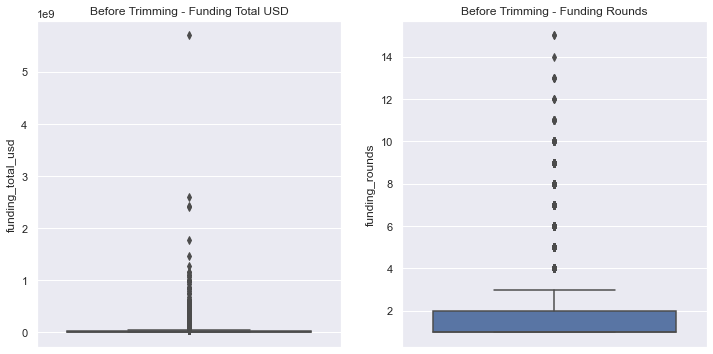

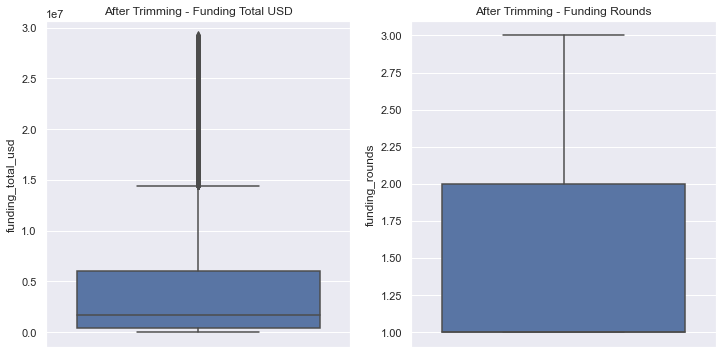

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting before trimming
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=data, y='funding_total_usd')
plt.title('Before Trimming - Funding Total USD')

plt.subplot(1, 2, 2)
sns.boxplot(data=data, y='funding_rounds')
plt.title('Before Trimming - Funding Rounds')

plt.show()

# Plotting after trimming
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=data_no_outliers, y='funding_total_usd')
plt.title('After Trimming - Funding Total USD')

plt.subplot(1, 2, 2)
sns.boxplot(data=data_no_outliers, y='funding_rounds')
plt.title('After Trimming - Funding Rounds')

plt.show()


In [27]:
# Define a function to remove outliers based on the IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Removing outliers for 'funding_total_usd'
data = remove_outliers_iqr(data, 'funding_total_usd')

# Removing outliers for 'funding_rounds'
data = remove_outliers_iqr(data_no_outliers, 'funding_rounds')

print(f"Deleted outliers for 'funding_total_usd' and 'funding_rounds'.")


Deleted outliers for 'funding_total_usd' and 'funding_rounds'.


In [28]:
data

category_code     status  founded_at   closed_at country_code  \
13                   web   acquired  2007-10-01         NaN          USA   
20             cleantech  operating  2003-01-01         NaN          USA   
26                mobile  operating  2003-11-01         NaN          AUS   
32             education  operating  2010-10-01         NaN          USA   
36               medical  operating  2006-01-01         NaN          USA   
...                  ...        ...         ...         ...          ...   
196526            mobile     closed  2008-05-22  2012-08-15          USA   
196537            social  operating  2011-01-11         NaN          CAN   
196540       games_video     closed  2006-06-01  2012-07-03          USA   
196549  public_relations  operating  2007-11-01         NaN          USA   
196552         ecommerce  operating  2007-09-01         NaN          USA   

       first_investment_at last_investment_at  investment_rounds  \
13                     NaN                NaN                NaN   
20                     NaN                NaN                NaN   
26                     NaN                NaN                NaN   
32                     NaN                NaN                NaN   
36                     NaN                NaN                NaN   
...                    ...                ...                ...   
196526                 NaN                NaN                NaN   
196537                 NaN                NaN                NaN   
196540                 NaN                NaN                NaN   
196549                 NaN                NaN                NaN   
196552                 NaN                NaN                NaN   

       first_funding_at last_funding_at  funding_rounds  funding_total_usd  \
13           2008-02-26      2008-02-26             1.0          5000000.0   
20           2011-03-08      2012-01-26             3.0         10125293.0   
26           2003-11-01      2003-11-01             1.0           250000.0   
32           2011-04-16      2011-04-16             1.0           100000.0   
36           2011-09-06      2012-07-10             2.0         11300000.0   
...                 ...             ...             ...                ...   
196526       2008-05-18      2008-05-18             1.0           130000.0   
196537       2011-09-06      2011-09-06             1.0           500000.0   
196540       2008-03-12      2009-02-01             2.0          1100000.0   
196549       2008-08-25      2008-08-25             1.0           750000.0   
196552       2008-06-01      2008-06-01             1.0           475000.0   

       first_milestone_at last_milestone_at  milestones  relationships  \
13             2008-05-01        2012-09-13         3.0           14.0   
20             2010-01-01        2010-01-01         1.0            6.0   
26             2007-11-01        2007-11-01         1.0            2.0   
32             2010-10-01        2010-10-01         1.0            NaN   
36                    NaN               NaN         NaN            2.0   
...                   ...               ...         ...            ...   
196526         2008-08-03        2009-09-01         2.0            3.0   
196537         2011-01-11        2011-01-11         1.0            2.0   
196540         2005-11-01        2008-09-10         2.0            4.0   
196549         2013-05-01        2013-05-01         1.0           14.0   
196552         2006-07-01        2008-09-10         2.0            1.0   

              lat         lng  
13      37.386052 -122.083851  
20      30.267153  -97.743061  
26     -27.469771  153.025124  
32            NaN         NaN  
36      42.018989  -71.007822  
...           ...         ...  
196526  37.774929 -122.419415  
196537  28.805267  -97.003598  
196540  37.774929 -122.419415  
196549  37.338208 -121.886329  
196552  34.035633 -118.515590  

[16880 rows x 18 columns]

## B. Date Transformation

1.a. Convert founded_at, first_funded_at, last_funding_at, first_milestone_at , last_milestone_at to years.

In [29]:
date_columns = ['founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'first_milestone_at', 'last_milestone_at']
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce').dt.year
data[date_columns].head()   # print

founded_at  closed_at  first_funding_at  last_funding_at  \
13        2007        NaN            2008.0           2008.0   
20        2003        NaN            2011.0           2012.0   
26        2003        NaN            2003.0           2003.0   
32        2010        NaN            2011.0           2011.0   
36        2006        NaN            2011.0           2012.0   

    first_milestone_at  last_milestone_at  
13              2008.0             2012.0  
20              2010.0             2010.0  
26              2007.0             2007.0  
32              2010.0             2010.0  
36                 NaN                NaN

1.b. Generalize the categorical data i.e. category_code and country_code

In [30]:
#Check the repetition of value in ascending order and keep the first 10 values and name remaining one as other.
data['category_code'].nunique()

42

In [31]:
# Generalizing 'category_code'
category_counts = data['category_code'].value_counts(ascending=False)
top_10_categories = category_counts.head(10).index
data['category_code'] = data['category_code'].apply(lambda x: x if x in top_10_categories else 'other')
print(data['category_code'].value_counts())

other          5121
software       2963
web            1679
biotech        1420
mobile         1287
enterprise      956
ecommerce       929
games_video     772
advertising     752
hardware        580
analytics       421
Name: category_code, dtype: int64


In [32]:
#One-hot encoding to category_code
data_encoded = pd.get_dummies(data['category_code'], prefix='category_code', drop_first=False)
# Concatenate category with company dataset
data = pd.concat([data, data_encoded], axis=1)
# Since, We've added the encoded category_columns, let's delete original category_code
data.drop(columns=['category_code'], inplace=True)

In [33]:
# Check the repetition of value in ascending order and keep the first 10 values and name remaining one as other.
data['country_code'].nunique()

108

In [34]:
# Generalizing 'country_code'
country_counts = data['country_code'].value_counts(ascending=False)
top_10_countries = country_counts.head(10).index
data['country_code'] = data['country_code'].apply(lambda x: x if x in top_10_countries else 'other')
print(data['country_code'].value_counts())

USA      11449
other     2016
GBR       1020
CAN        574
FRA        410
ISR        321
DEU        281
IND        276
ESP        235
AUS        151
IRL        147
Name: country_code, dtype: int64


In [35]:
#One-hot encoding to country_code
data_encoded = pd.get_dummies(data['country_code'], prefix='country_code', drop_first=False)
# Concatenate country with company dataset
data = pd.concat([data, data_encoded], axis=1)
data.drop(columns=['country_code'], inplace=True)

In [36]:
data.columns

Index(['status', 'founded_at', 'closed_at', 'first_investment_at',
       'last_investment_at', 'investment_rounds', 'first_funding_at',
       'last_funding_at', 'funding_rounds', 'funding_total_usd',
       'first_milestone_at', 'last_milestone_at', 'milestones',
       'relationships', 'lat', 'lng', 'category_code_advertising',
       'category_code_analytics', 'category_code_biotech',
       'category_code_ecommerce', 'category_code_enterprise',
       'category_code_games_video', 'category_code_hardware',
       'category_code_mobile', 'category_code_other', 'category_code_software',
       'category_code_web', 'country_code_AUS', 'country_code_CAN',
       'country_code_DEU', 'country_code_ESP', 'country_code_FRA',
       'country_code_GBR', 'country_code_IND', 'country_code_IRL',
       'country_code_ISR', 'country_code_USA', 'country_code_other'],
      dtype='object')

Now create new feature isClosed from closed_at and status.

In [37]:
data['isClosed'] = data['status'].apply(lambda x: 1 if x in ['operating', 'ipo'] else (0 if x in ['acquired', 'closed'] else None))
     

Here Create active_days.

In [38]:
data['closed_at'] = data.apply(lambda row: 2021 if row['status'] in ['operating', 'ipo'] else (0 if row['status'] in ['acquired', 'closed'] else row['closed_at']), axis=1)
data['active_days'] = data.apply(lambda row: row['closed_at'] - row['founded_at'] if row['closed_at'] > 0 and row['founded_at'] > 0 else (2021 - row['founded_at']) if row['status'] in ['operating', 'ipo'] and row['founded_at'] > 0 else 0, axis=1)
data.drop(columns=['closed_at'], inplace=True)
     

In [39]:
data.isnull().sum()

status                           0
founded_at                       0
first_investment_at          16774
last_investment_at           16774
investment_rounds            16774
first_funding_at                51
last_funding_at                 51
funding_rounds                   0
funding_total_usd                0
first_milestone_at            6827
last_milestone_at             6827
milestones                    6827
relationships                 2430
lat                            451
lng                            451
category_code_advertising        0
category_code_analytics          0
category_code_biotech            0
category_code_ecommerce          0
category_code_enterprise         0
category_code_games_video        0
category_code_hardware           0
category_code_mobile             0
category_code_other              0
category_code_software           0
category_code_web                0
country_code_AUS                 0
country_code_CAN                 0
country_code_DEU    

In [40]:
numerical_columns = data.select_dtypes(include=['number']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())
print(data[numerical_columns].isnull().sum())

founded_at                   0
investment_rounds            0
first_funding_at             0
last_funding_at              0
funding_rounds               0
funding_total_usd            0
first_milestone_at           0
last_milestone_at            0
milestones                   0
relationships                0
lat                          0
lng                          0
category_code_advertising    0
category_code_analytics      0
category_code_biotech        0
category_code_ecommerce      0
category_code_enterprise     0
category_code_games_video    0
category_code_hardware       0
category_code_mobile         0
category_code_other          0
category_code_software       0
category_code_web            0
country_code_AUS             0
country_code_CAN             0
country_code_DEU             0
country_code_ESP             0
country_code_FRA             0
country_code_GBR             0
country_code_IND             0
country_code_IRL             0
country_code_ISR             0
country_

In [41]:
data.isnull().sum()

status                           0
founded_at                       0
first_investment_at          16774
last_investment_at           16774
investment_rounds                0
first_funding_at                 0
last_funding_at                  0
funding_rounds                   0
funding_total_usd                0
first_milestone_at               0
last_milestone_at                0
milestones                       0
relationships                    0
lat                              0
lng                              0
category_code_advertising        0
category_code_analytics          0
category_code_biotech            0
category_code_ecommerce          0
category_code_enterprise         0
category_code_games_video        0
category_code_hardware           0
category_code_mobile             0
category_code_other              0
category_code_software           0
category_code_web                0
country_code_AUS                 0
country_code_CAN                 0
country_code_DEU    

In [42]:
data.dropna(subset=['first_investment_at', 'last_investment_at'] ,inplace=True)

In [43]:
data.isnull().sum()

status                       0
founded_at                   0
first_investment_at          0
last_investment_at           0
investment_rounds            0
first_funding_at             0
last_funding_at              0
funding_rounds               0
funding_total_usd            0
first_milestone_at           0
last_milestone_at            0
milestones                   0
relationships                0
lat                          0
lng                          0
category_code_advertising    0
category_code_analytics      0
category_code_biotech        0
category_code_ecommerce      0
category_code_enterprise     0
category_code_games_video    0
category_code_hardware       0
category_code_mobile         0
category_code_other          0
category_code_software       0
category_code_web            0
country_code_AUS             0
country_code_CAN             0
country_code_DEU             0
country_code_ESP             0
country_code_FRA             0
country_code_GBR             0
country_

## Exploratory Data Analysis (EDA) Steps:

In [44]:
data.head()

status  founded_at first_investment_at last_investment_at  \
897         ipo        1991          2007-01-30         2007-11-27   
2324  operating        2007          2012-11-05         2012-11-05   
4750        ipo        1996          2008-04-24         2008-04-24   
5052   acquired        1990          2013-02-05         2013-07-02   
7001  operating        2011          2012-02-20         2012-02-20   

      investment_rounds  first_funding_at  last_funding_at  funding_rounds  \
897                 2.0            2011.0           2011.0             1.0   
2324                1.0            2012.0           2012.0             1.0   
4750                1.0            2010.0           2010.0             1.0   
5052                2.0            2012.0           2012.0             1.0   
7001                1.0            2011.0           2011.0             1.0   

      funding_total_usd  first_milestone_at  ...  country_code_ESP  \
897            100000.0         2009.000000  ...                 0   
2324          4300000.0         2011.000000  ...                 0   
4750          3100000.0         2010.244007  ...                 0   
5052          2400000.0         2006.000000  ...                 0   
7001          1380700.0         2010.244007  ...                 0   

      country_code_FRA  country_code_GBR  country_code_IND  country_code_IRL  \
897                  0                 0                 0                 0   
2324                 0                 0                 0                 0   
4750                 0                 0                 0                 0   
5052                 0                 0                 0                 0   
7001                 0                 0                 0                 0   

      country_code_ISR  country_code_USA  country_code_other  isClosed  \
897                  0                 1                   0         1   
2324                 0                 0                   1         1   
4750                 0                 1                   0         1   
5052                 0                 1                   0         0   
7001                 0                 0                   1         1   

      active_days  
897            30  
2324           14  
4750           25  
5052            0  
7001           10  

[5 rows x 39 columns]

In [45]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

status                       0
founded_at                   0
first_investment_at          0
last_investment_at           0
investment_rounds            0
first_funding_at             0
last_funding_at              0
funding_rounds               0
funding_total_usd            0
first_milestone_at           0
last_milestone_at            0
milestones                   0
relationships                0
lat                          0
lng                          0
category_code_advertising    0
category_code_analytics      0
category_code_biotech        0
category_code_ecommerce      0
category_code_enterprise     0
category_code_games_video    0
category_code_hardware       0
category_code_mobile         0
category_code_other          0
category_code_software       0
category_code_web            0
country_code_AUS             0
country_code_CAN             0
country_code_DEU             0
country_code_ESP             0
country_code_FRA             0
country_code_GBR             0
country_

In [46]:
# Handling missing values (example: filling with mean for numerical, mode for categorical)
data.fillna(data.mean(), inplace=True)  # For numerical features
data.fillna(data.mode().iloc[0], inplace=True)  # For categorical features

### Univariate Data Analysis

In [47]:
# Summary statistics for numerical features
data.describe()

founded_at  investment_rounds  first_funding_at  last_funding_at  \
count   106.000000         106.000000        106.000000       106.000000   
mean   1997.188679          10.000000       2008.728886      2009.621528   
std      20.696037          47.576104          4.881258         4.584232   
min    1908.000000           1.000000       1987.000000      1987.000000   
25%    1995.000000           1.000000       2008.000000      2009.250000   
50%    2002.000000           1.000000       2010.630935      2011.000000   
75%    2009.750000           3.000000       2012.000000      2012.000000   
max    2013.000000         478.000000       2013.000000      2013.000000   

       funding_rounds  funding_total_usd  first_milestone_at  \
count      106.000000       1.060000e+02          106.000000   
mean         1.481132       8.576298e+06         2009.914190   
std          0.679371       8.302352e+06            3.273519   
min          1.000000       1.400000e+04         1990.000000   
25%          1.000000       2.000000e+06         2010.000000   
50%          1.000000       6.000000e+06         2010.244007   
75%          2.000000       1.313875e+07         2012.000000   
max          3.000000       2.875833e+07         2013.000000   

       last_milestone_at  milestones  relationships  ...  country_code_ESP  \
count         106.000000  106.000000     106.000000  ...        106.000000   
mean         2011.460132    2.231133      46.078393  ...          0.018868   
std             2.992945    1.086619     151.169066  ...          0.136705   
min          1990.000000    1.000000       1.000000  ...          0.000000   
25%          2010.985875    1.593753       4.000000  ...          0.000000   
50%          2012.000000    2.000000       7.000000  ...          0.000000   
75%          2013.000000    3.000000      23.500000  ...          0.000000   
max          2013.000000    7.000000    1046.000000  ...          1.000000   

       country_code_FRA  country_code_GBR  country_code_IND  country_code_IRL  \
count        106.000000        106.000000        106.000000             106.0   
mean           0.018868          0.037736          0.009434               0.0   
std            0.136705          0.191462          0.097129               0.0   
min            0.000000          0.000000          0.000000               0.0   
25%            0.000000          0.000000          0.000000               0.0   
50%            0.000000          0.000000          0.000000               0.0   
75%            0.000000          0.000000          0.000000               0.0   
max            1.000000          1.000000          1.000000               0.0   

       country_code_ISR  country_code_USA  country_code_other    isClosed  \
count        106.000000        106.000000          106.000000  106.000000   
mean           0.028302          0.660377            0.160377    0.867925   
std            0.166622          0.475831            0.368699    0.340181   
min            0.000000          0.000000            0.000000    0.000000   
25%            0.000000          0.000000            0.000000    1.000000   
50%            0.000000          1.000000            0.000000    1.000000   
75%            0.000000          1.000000            0.000000    1.000000   
max            1.000000          1.000000            1.000000    1.000000   

       active_days  
count   106.000000  
mean     20.603774  
std      21.405686  
min       0.000000  
25%      10.000000  
50%      14.500000  
75%      23.750000  
max     113.000000  

[8 rows x 36 columns]

Visualizing Numerical Features (Univariate)

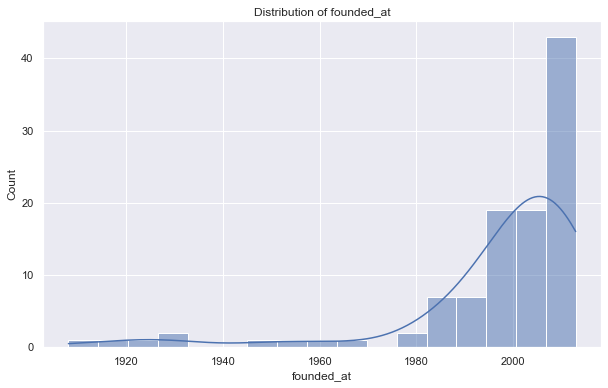

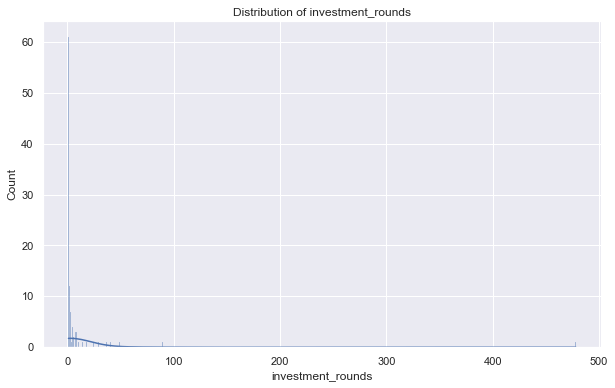

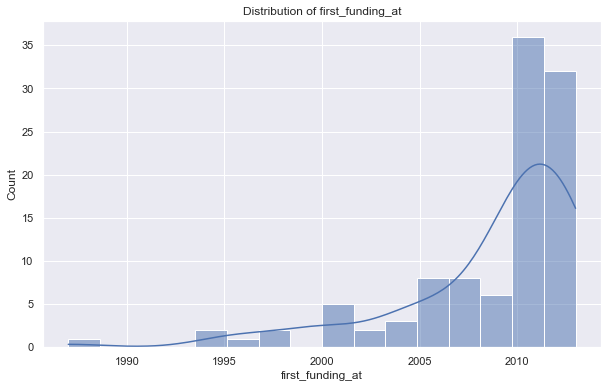

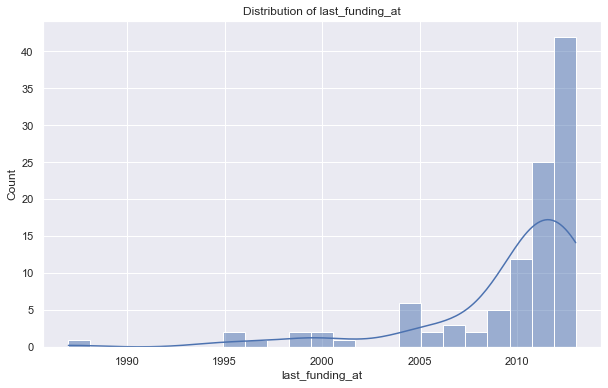

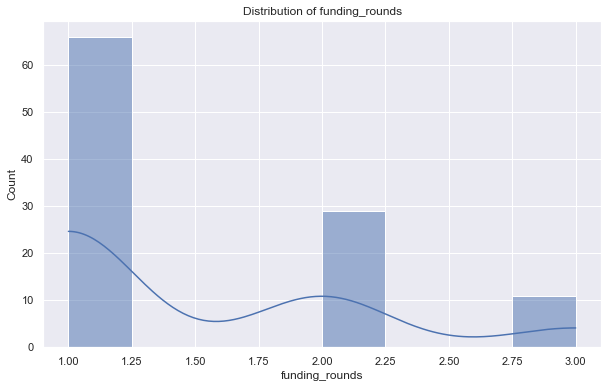

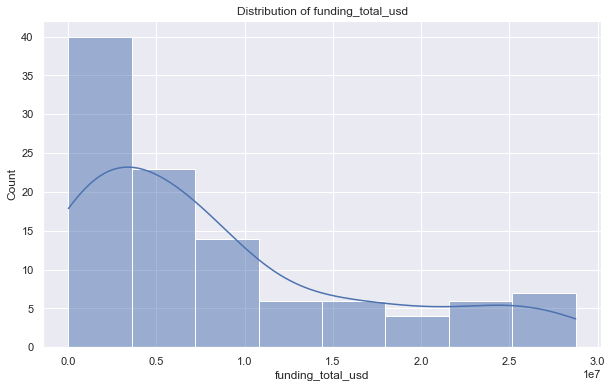

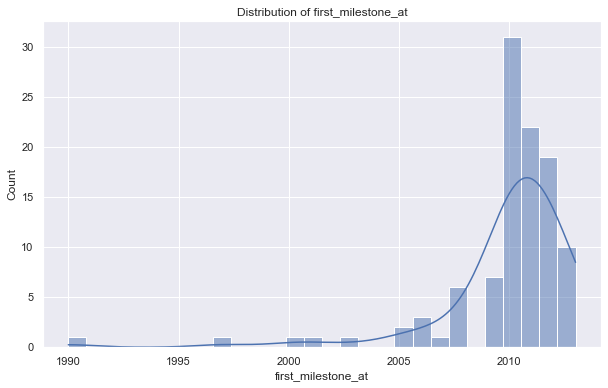

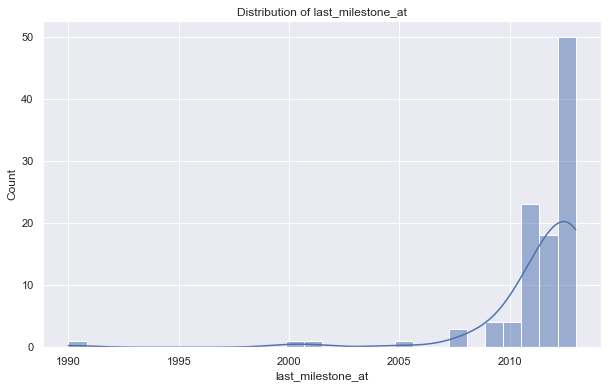

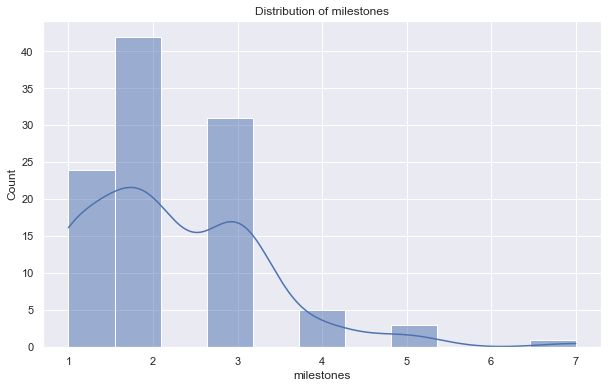

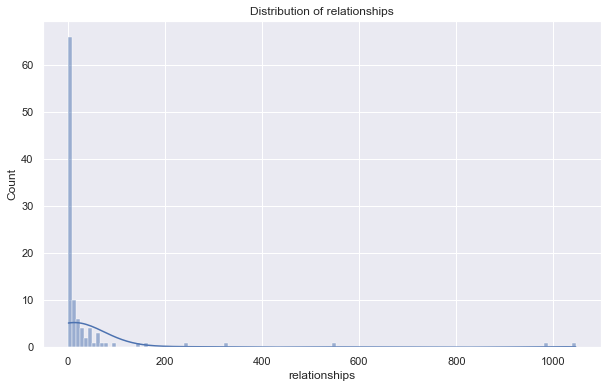

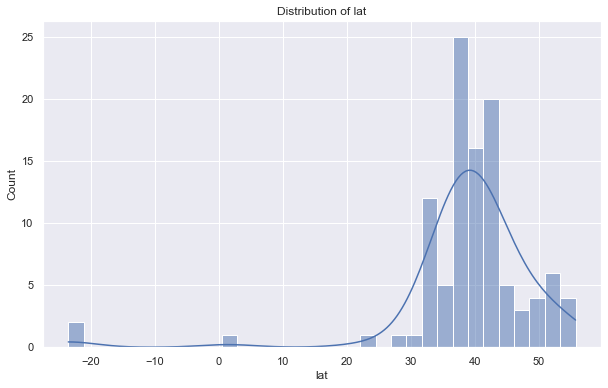

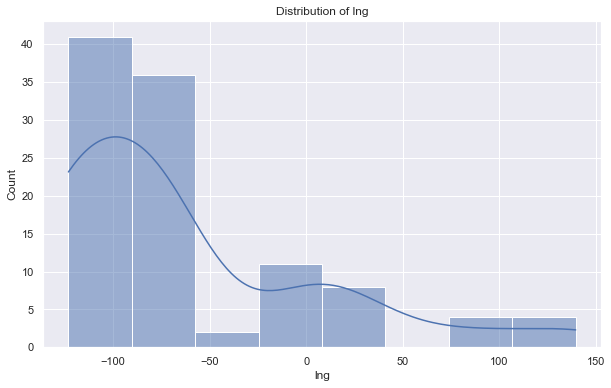

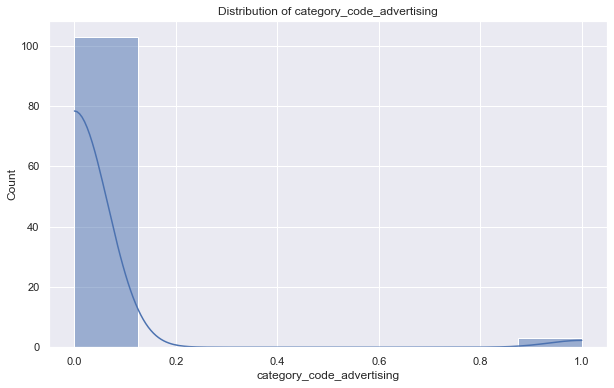

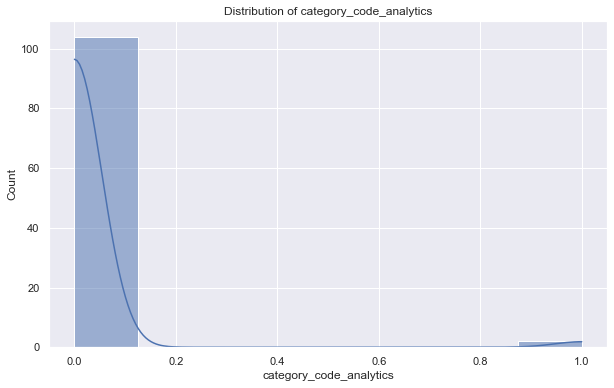

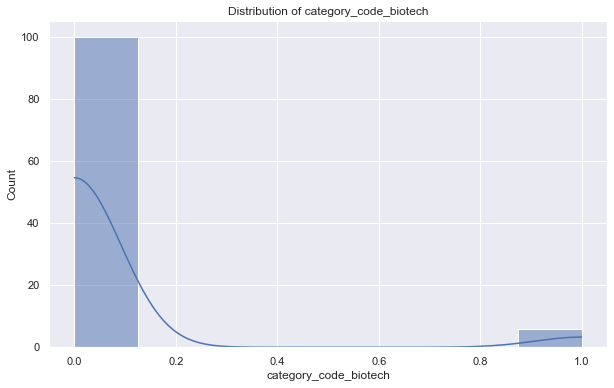

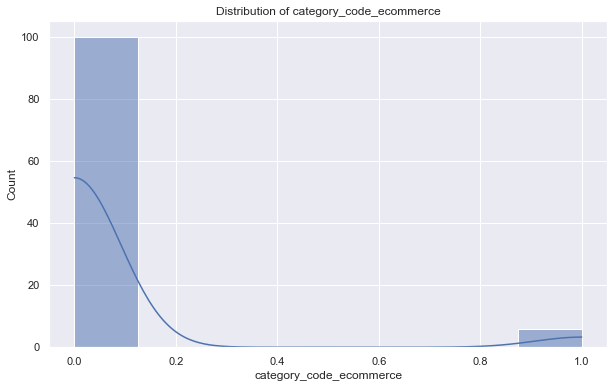

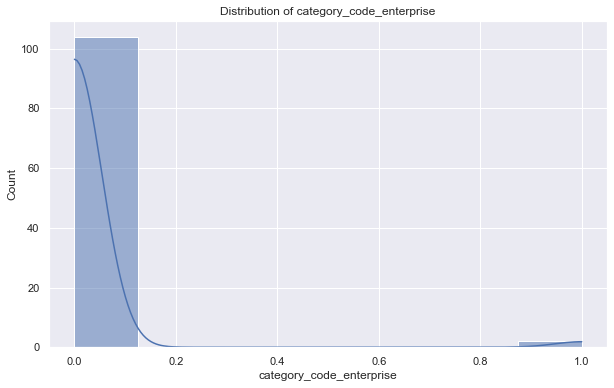

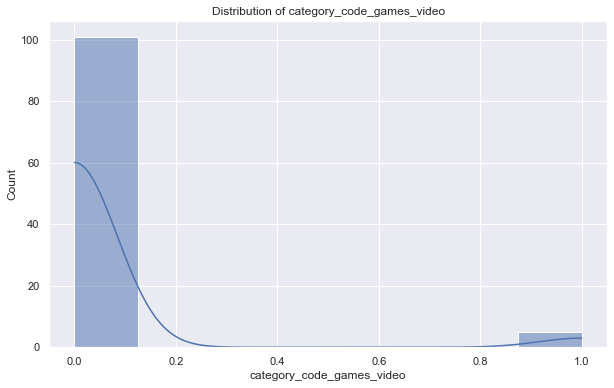

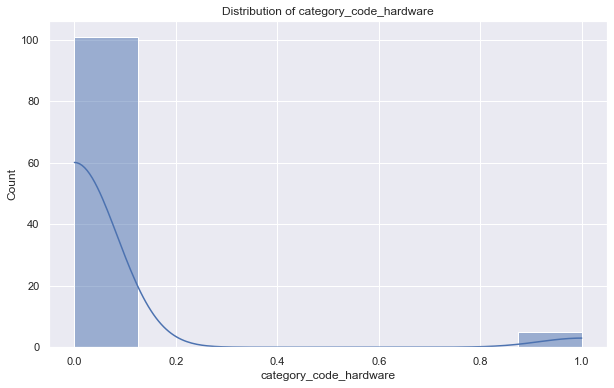

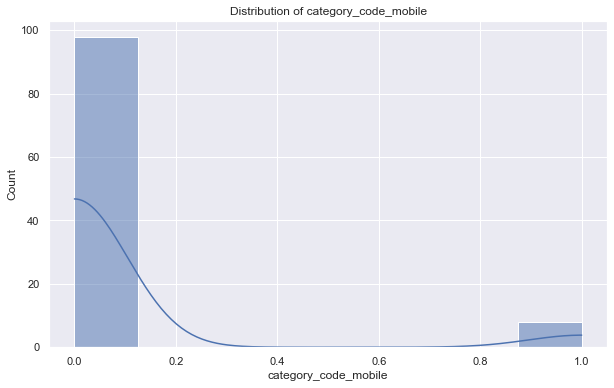

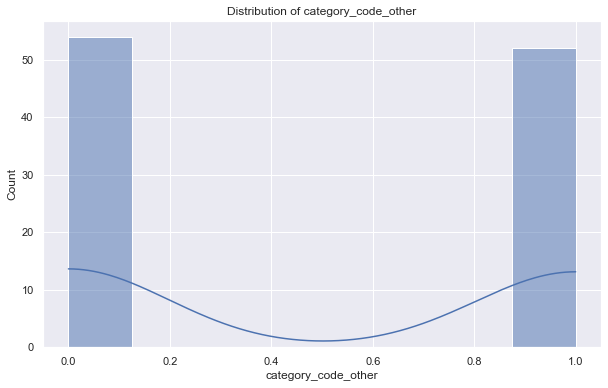

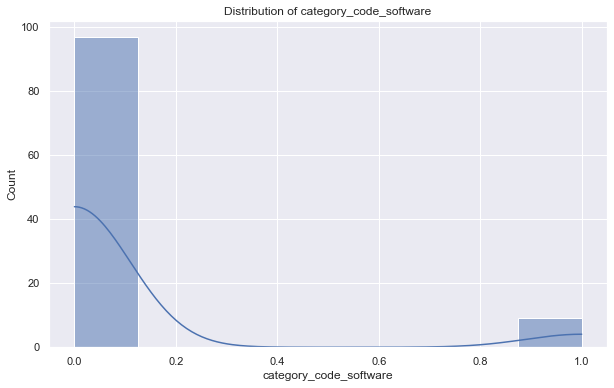

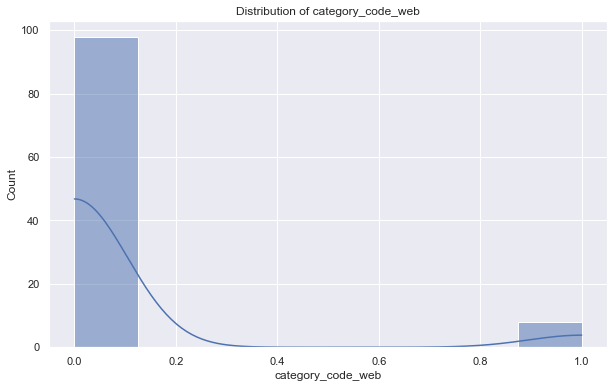

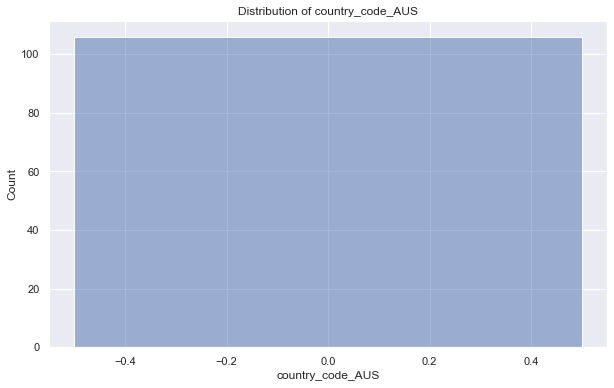

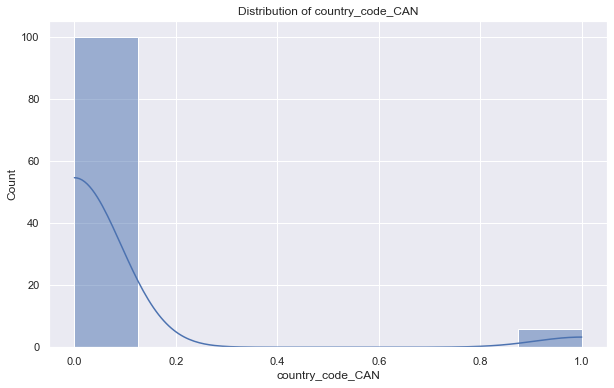

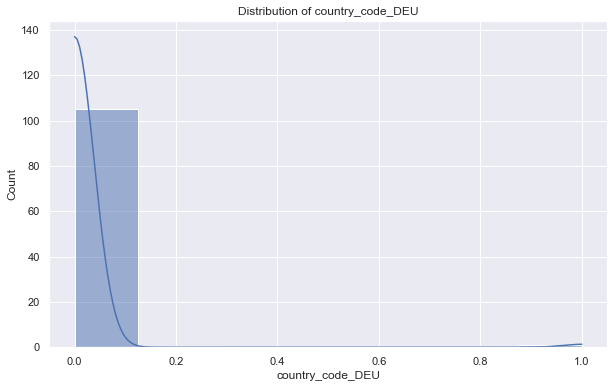

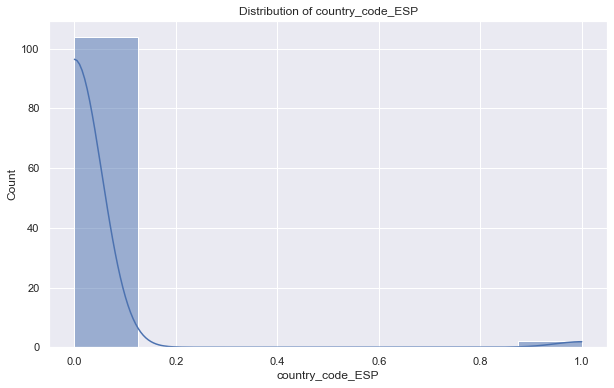

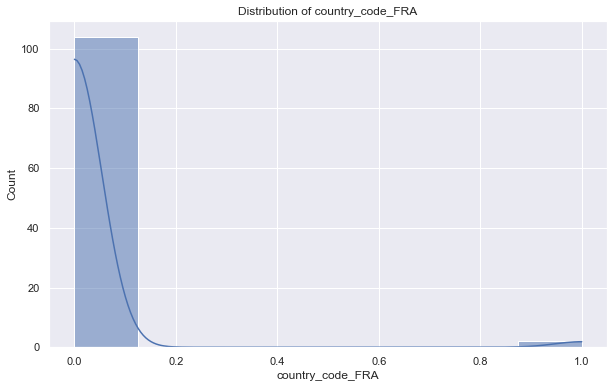

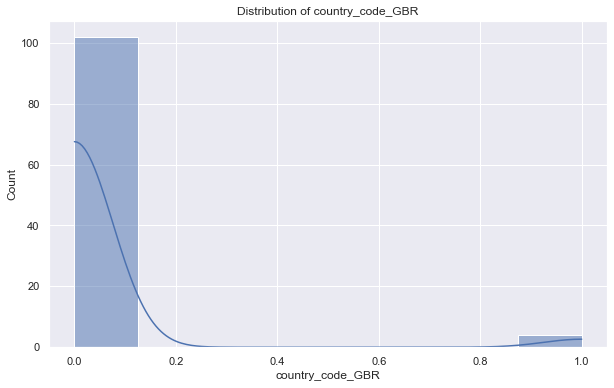

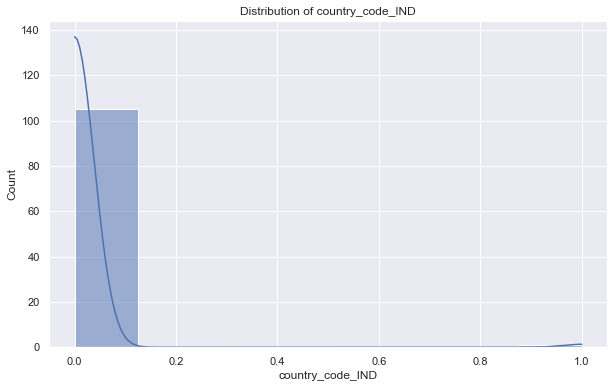

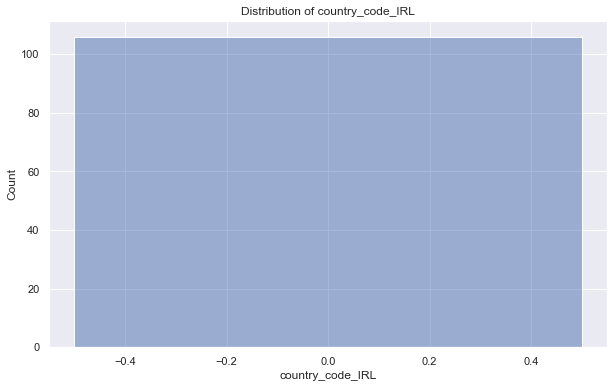

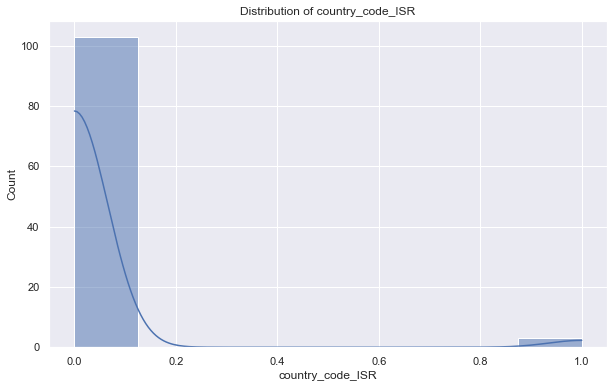

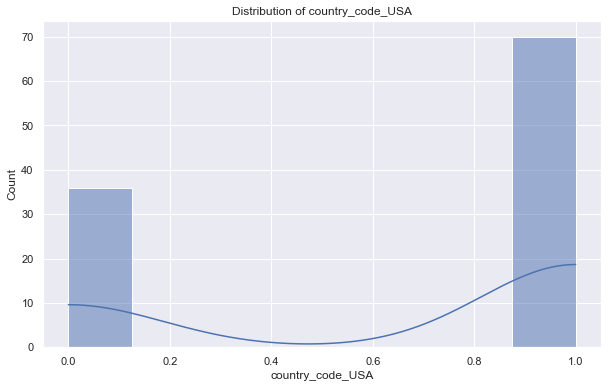

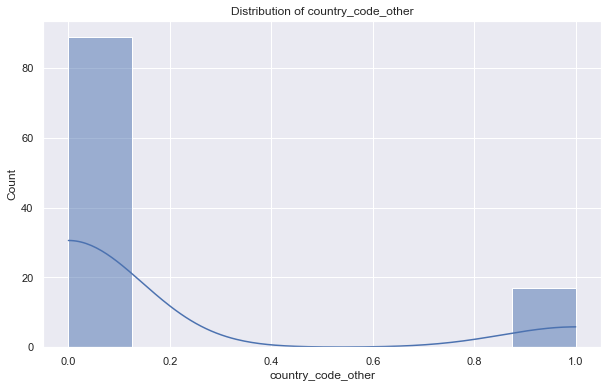

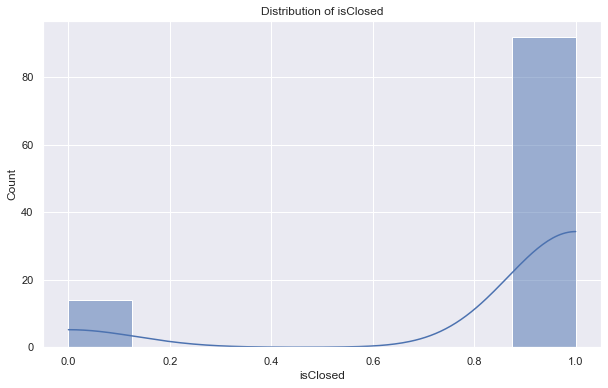

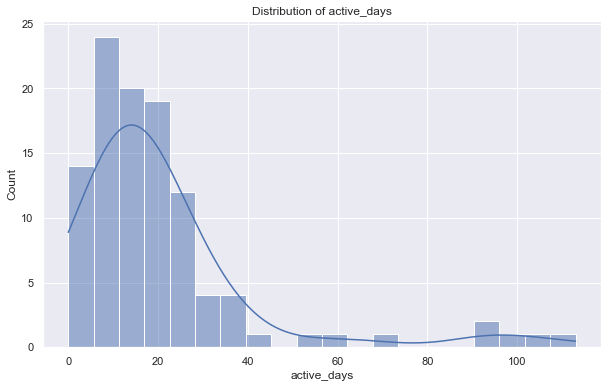

In [48]:
# Plot histograms and KDE for numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


Visualizing Categorical Features (Univariate)

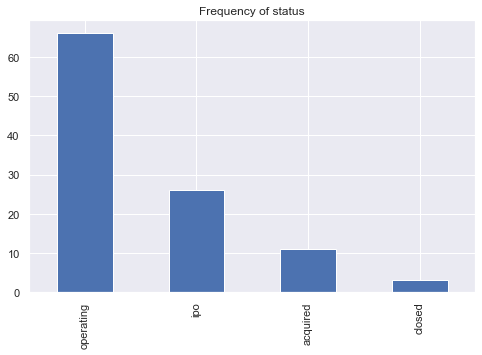

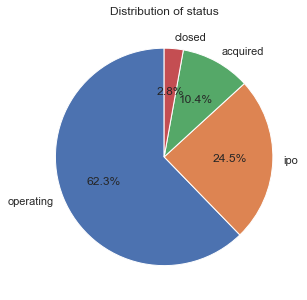

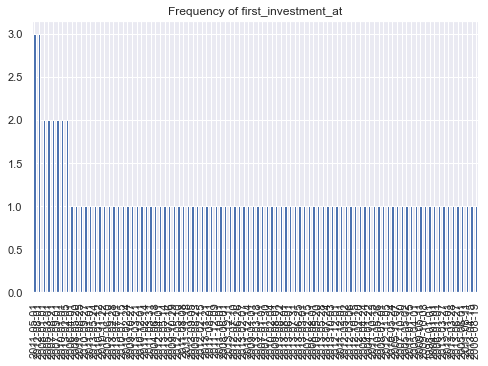

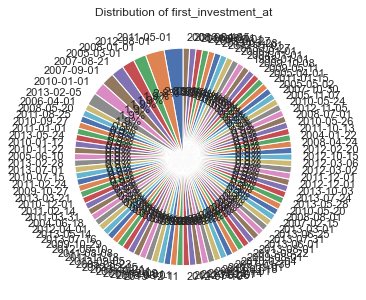

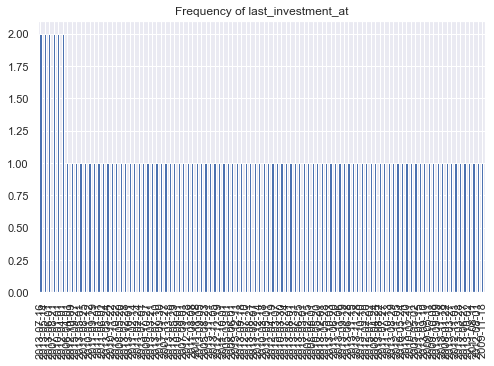

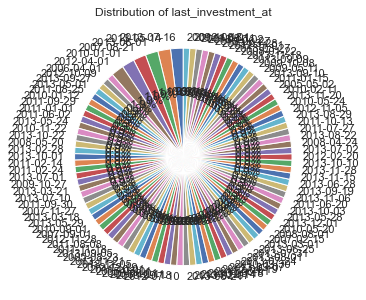

In [49]:
# Visualize categorical features with bar plots and pie charts
categorical_features = data.select_dtypes(include=[object]).columns

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    data[feature].value_counts().plot(kind='bar')
    plt.title(f'Frequency of {feature}')
    plt.show()
    
    # Pie chart
    data[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 5))
    plt.title(f'Distribution of {feature}')
    plt.ylabel('')
    plt.show()


Checking for Outliers

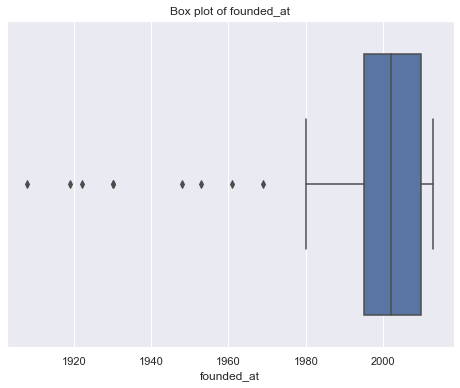

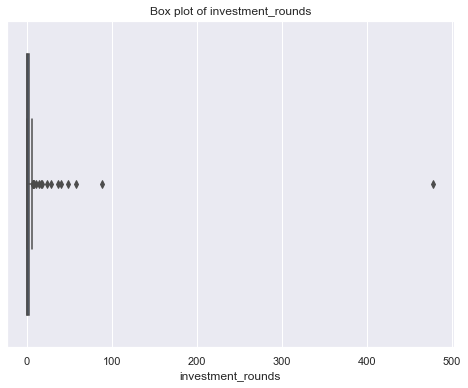

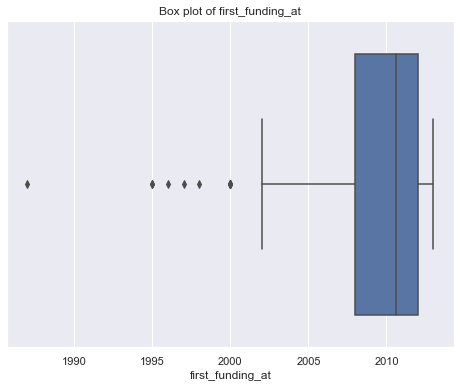

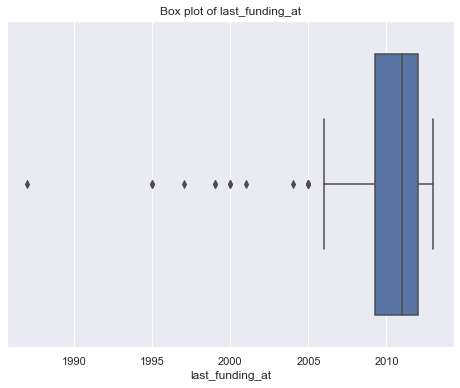

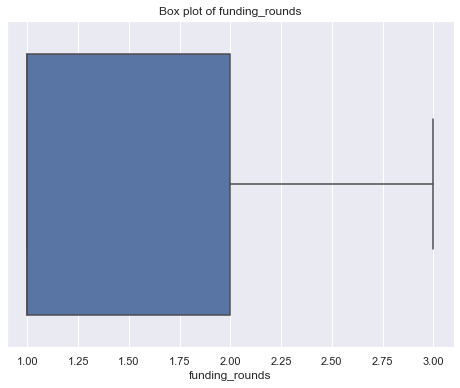

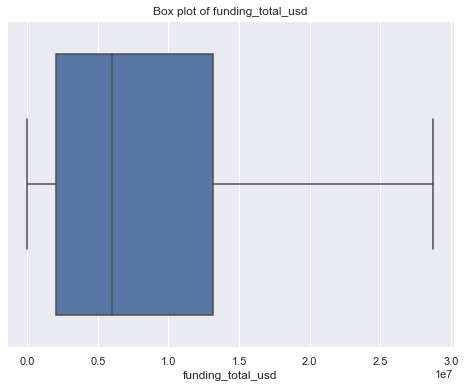

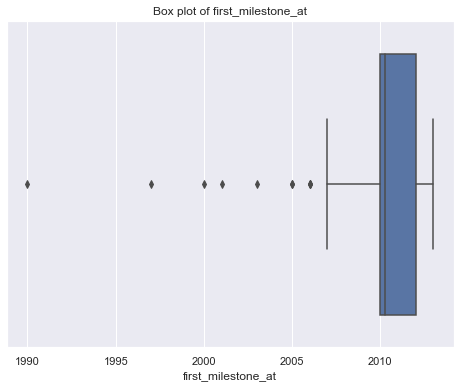

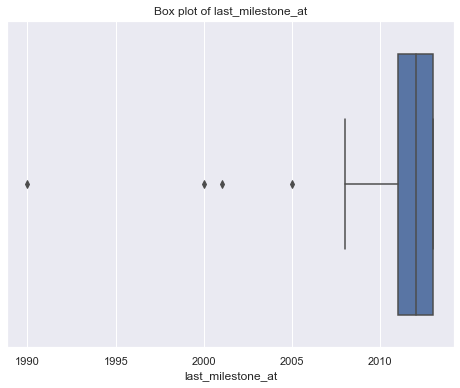

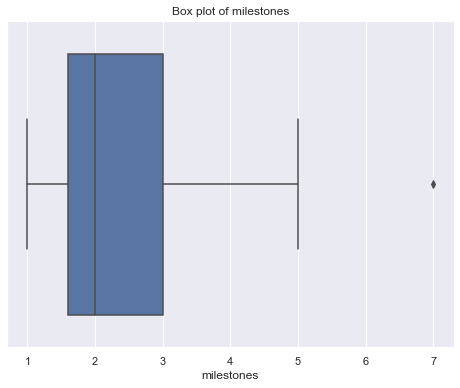

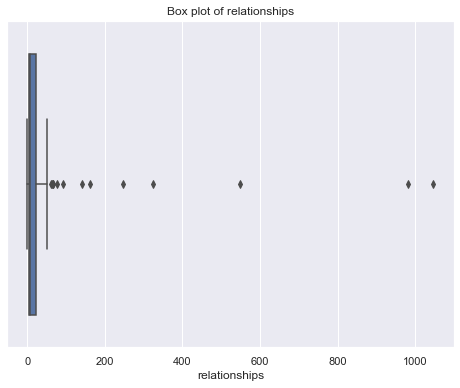

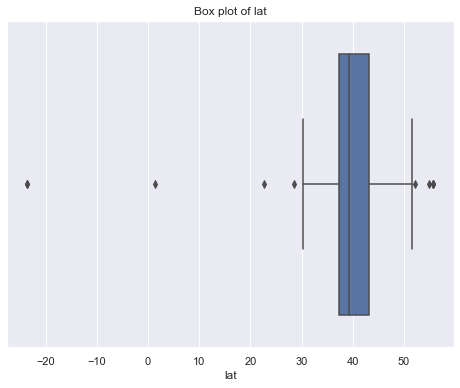

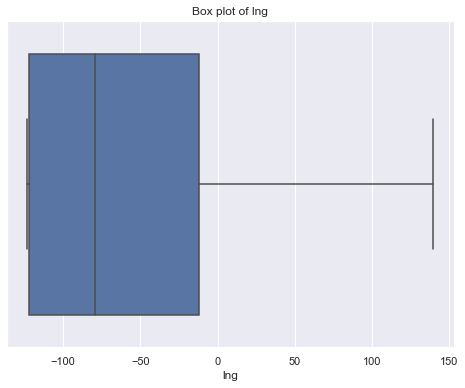

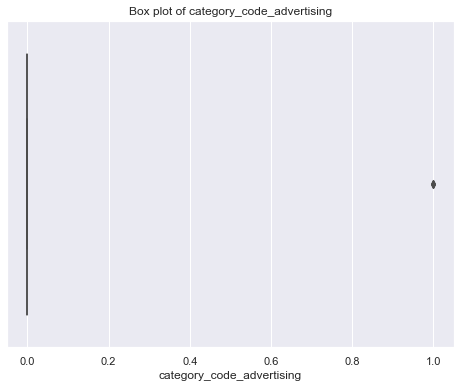

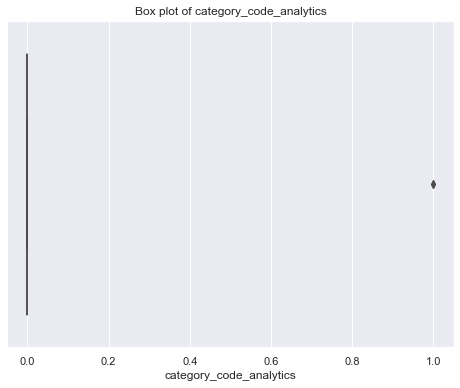

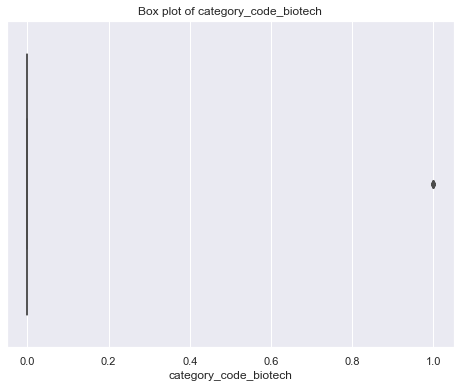

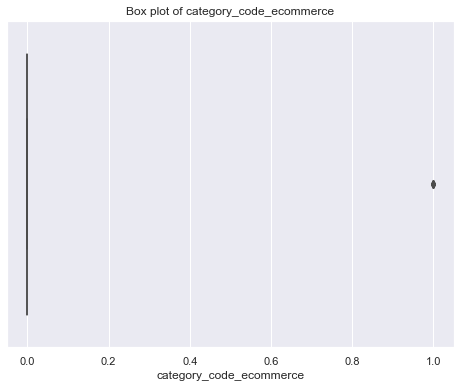

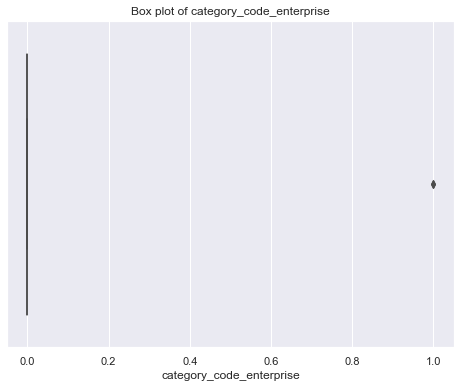

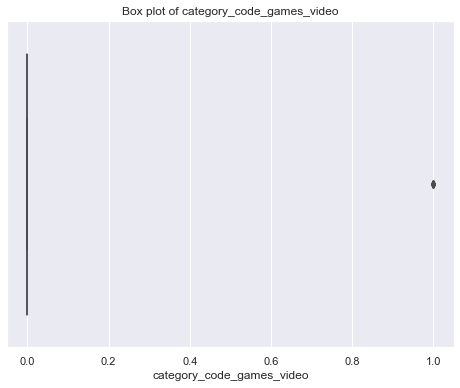

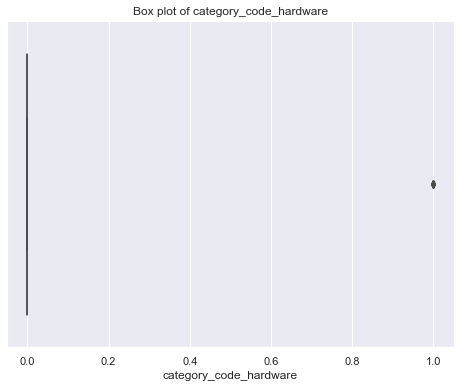

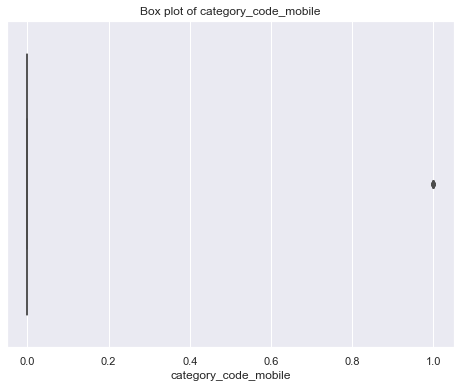

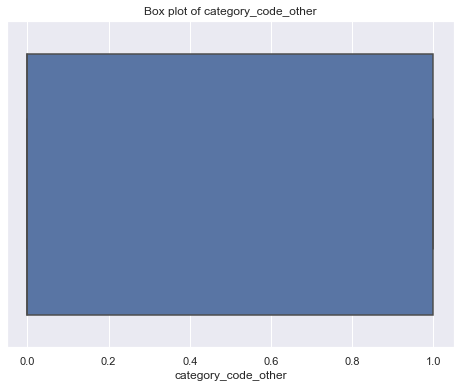

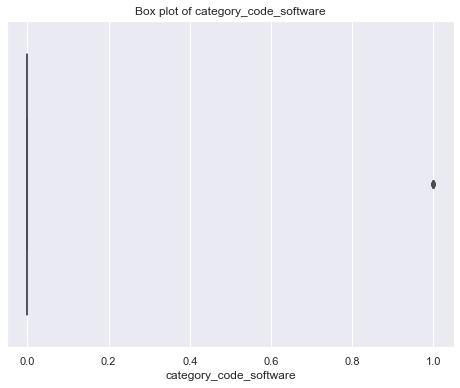

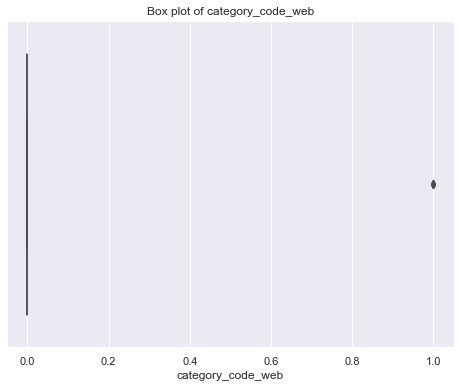

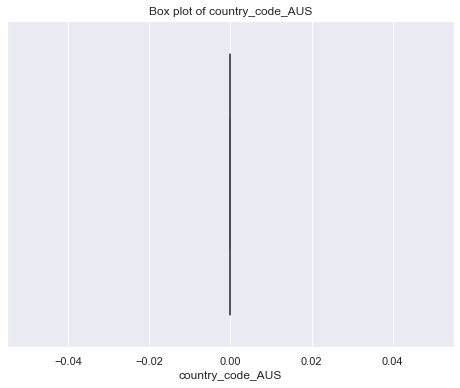

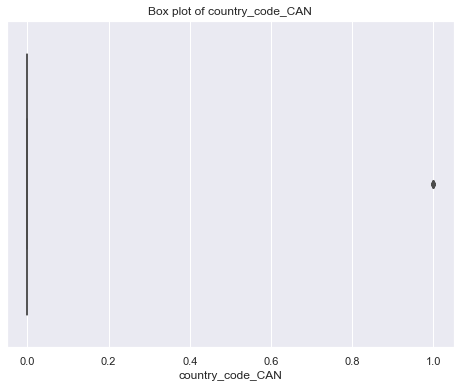

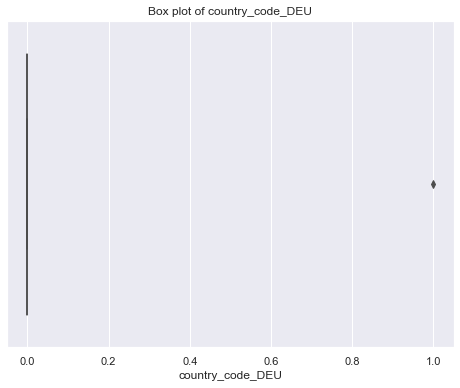

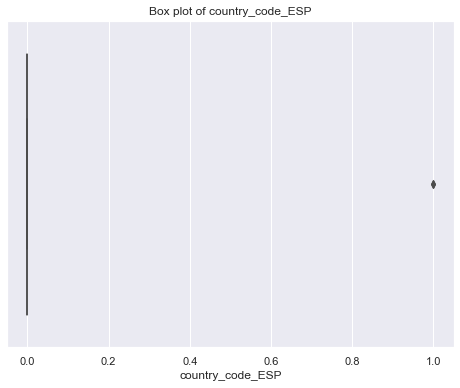

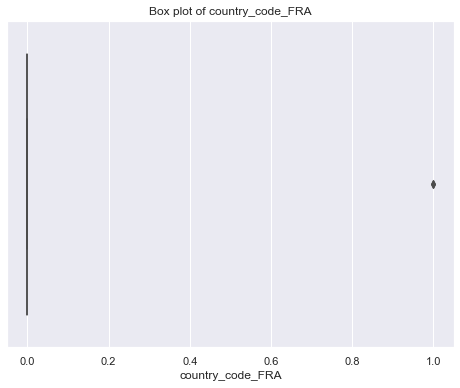

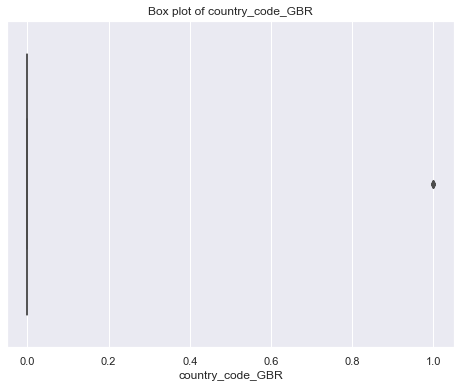

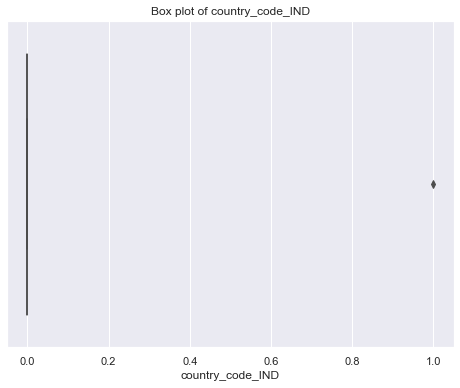

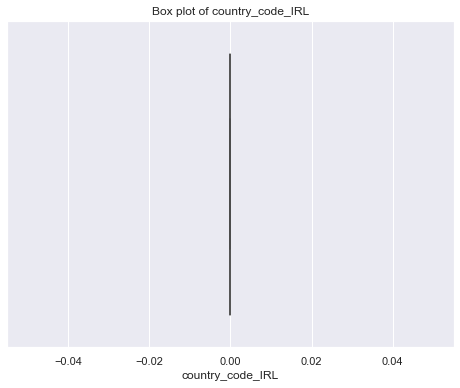

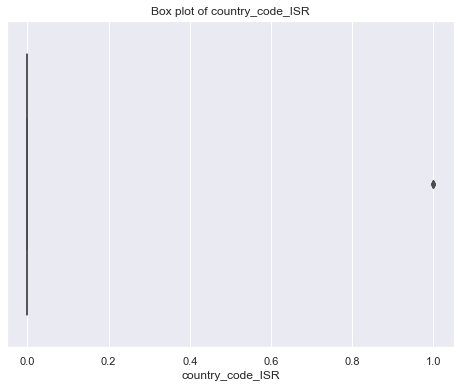

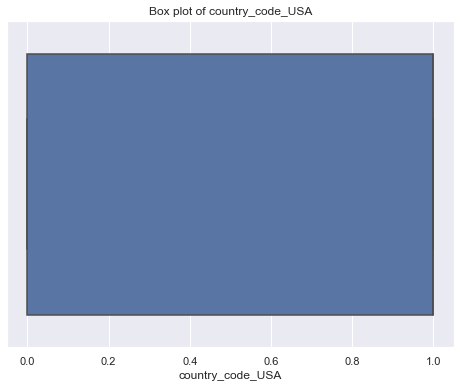

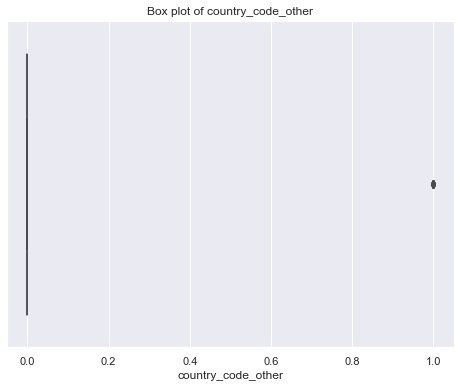

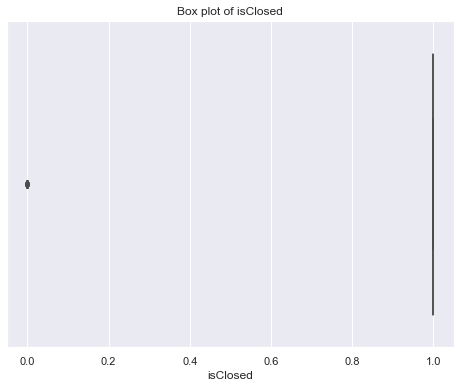

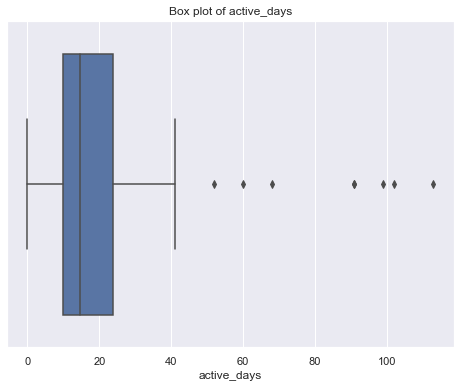

In [50]:
# Box plot to check for outliers in numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()


### Bivariate Data Analysis

Relationship Between Pairs of Numerical Features

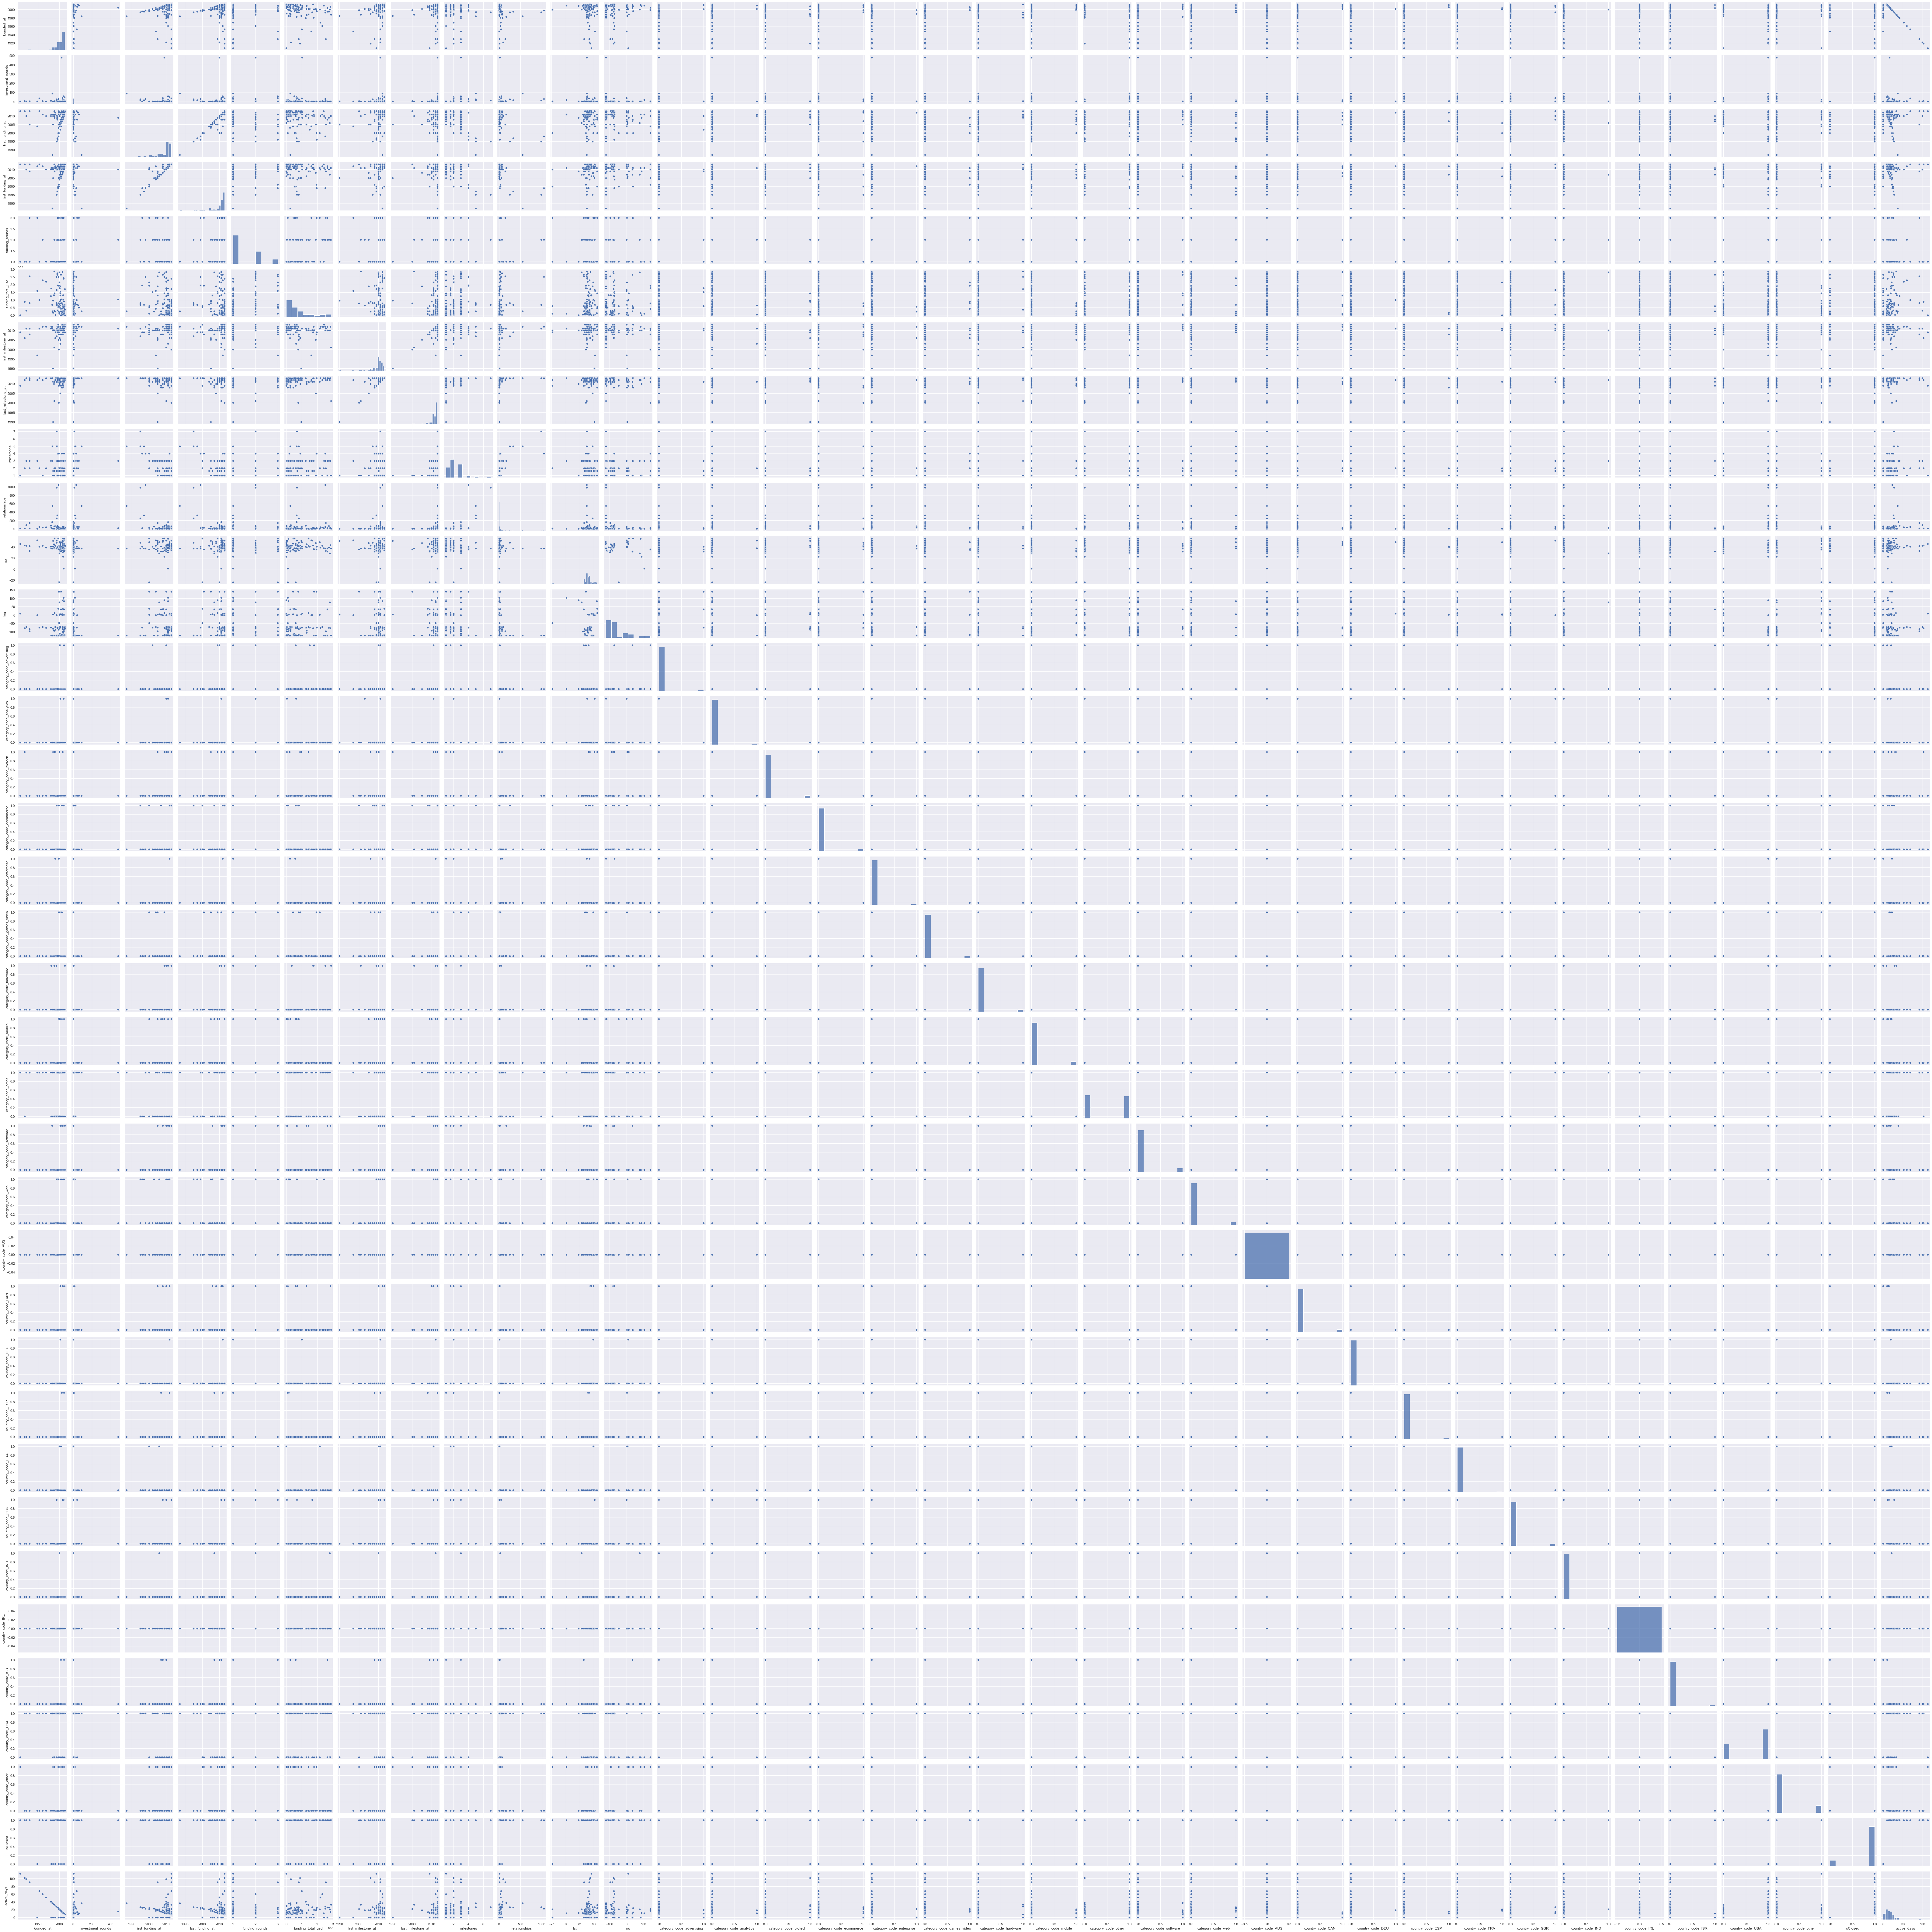

founded_at  investment_rounds  first_funding_at  \
founded_at                   1.000000           0.024229          0.062469   
investment_rounds            0.024229           1.000000         -0.084864   
first_funding_at             0.062469          -0.084864          1.000000   
last_funding_at              0.037335          -0.095323          0.918143   
funding_rounds               0.009061           0.083977         -0.316408   
funding_total_usd           -0.189577           0.001569         -0.192168   
first_milestone_at           0.248399           0.064231          0.157082   
last_milestone_at            0.049776           0.086548          0.020278   
milestones                  -0.050434           0.162243         -0.545339   
relationships               -0.102194           0.093406         -0.553423   
lat                         -0.089464          -0.015573          0.154975   
lng                          0.003241          -0.119736         -0.053760   
category_code_advertising    0.061958          -0.031237         -0.049025   
category_code_analytics      0.059321          -0.026358          0.050556   
category_code_biotech       -0.180620          -0.041384          0.055686   
category_code_ecommerce      0.071089          -0.022416         -0.103977   
category_code_enterprise    -0.018101          -0.024894          0.093373   
category_code_games_video    0.051971          -0.041350         -0.234895   
category_code_hardware       0.004443          -0.034772          0.113173   
category_code_mobile         0.111817          -0.054306         -0.028164   
category_code_other         -0.157407           0.162205          0.156775   
category_code_software       0.107298          -0.054322          0.114531   
category_code_web            0.063269          -0.032432         -0.292813   
country_code_AUS                  NaN                NaN               NaN   
country_code_CAN             0.134512          -0.029314          0.055686   
country_code_DEU             0.022795          -0.018549          0.065709   
country_code_ESP             0.076152          -0.016108          0.022011   
country_code_FRA             0.032392          -0.026358         -0.163529   
country_code_GBR             0.075097           0.003137          0.064672   
country_code_IND             0.013319          -0.018549         -0.054817   
country_code_IRL                  NaN                NaN               NaN   
country_code_ISR             0.075767          -0.032438         -0.013895   
country_code_USA            -0.135595           0.094657          0.053215   
country_code_other          -0.032710          -0.065153         -0.081447   
isClosed                     0.008984           0.071203          0.115882   
active_days                 -0.883691           0.003862          0.005303   

                           last_funding_at  funding_rounds  funding_total_usd  \
founded_at                        0.037335        0.009061          -0.189577   
investment_rounds                -0.095323        0.083977           0.001569   
first_funding_at                  0.918143       -0.316408          -0.192168   
last_funding_at                   1.000000       -0.038830          -0.077110   
funding_rounds                   -0.038830        1.000000           0.418916   
funding_total_usd                -0.077110        0.418916           1.000000   
first_milestone_at                0.118549       -0.096987          -0.102139   
last_milestone_at                 0.020480        0.035020          -0.032608   
milestones                       -0.580189        0.162389           0.130295   
relationships                    -0.612974        0.063785           0.120229   
lat                               0.101687       -0.078045           0.061510   
lng                              -0.032273        0.048620           0.004882   
category_code_advertising         0.001688       -0.037305           0.090512   
catego

In [51]:
# Pair plot to visualize relationships between numerical features
sns.pairplot(data[numerical_features])
plt.show()

# Compute correlation coefficients
correlation_matrix = data.corr(method='pearson')
correlation_matrix


Relationship Between Numerical and Categorical Features

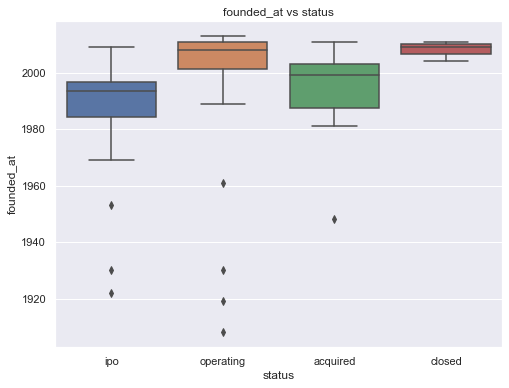

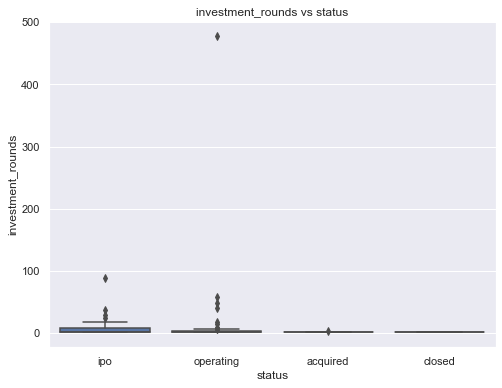

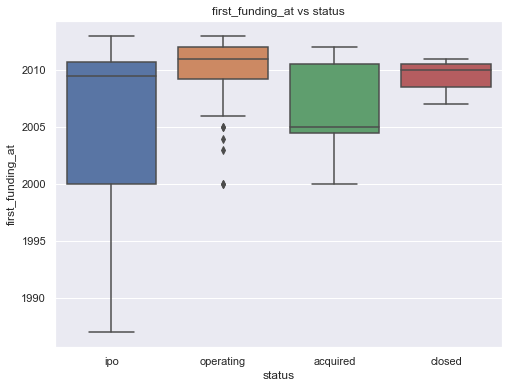

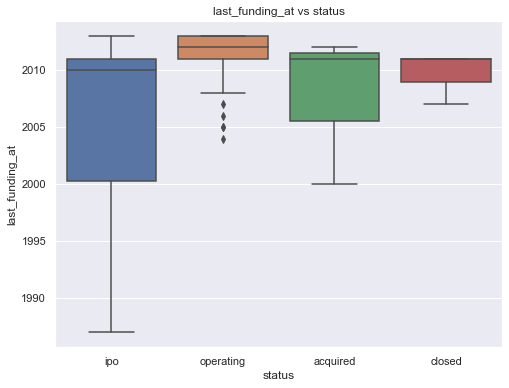

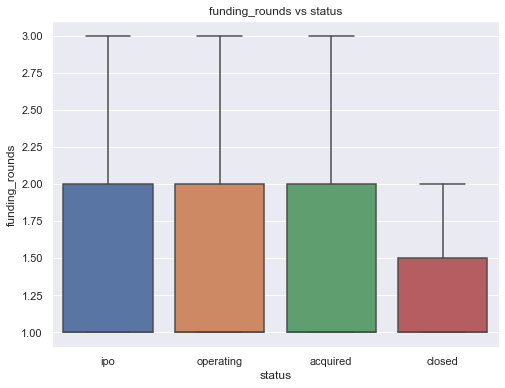

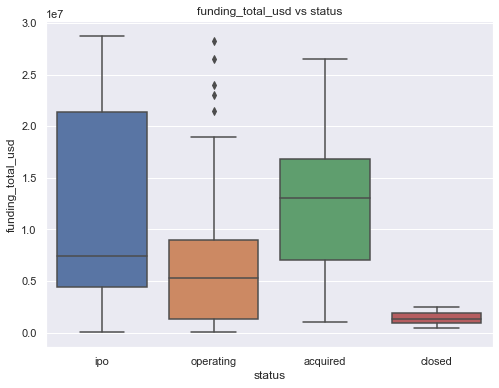

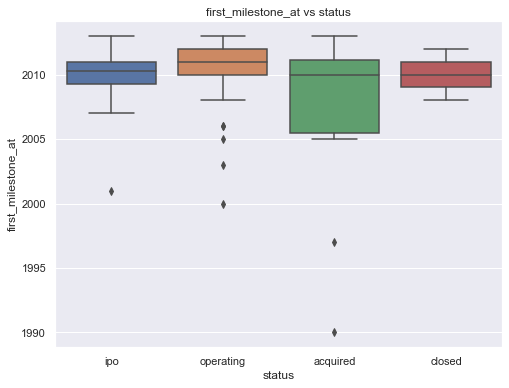

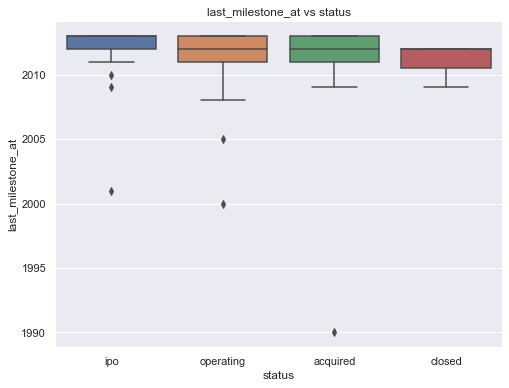

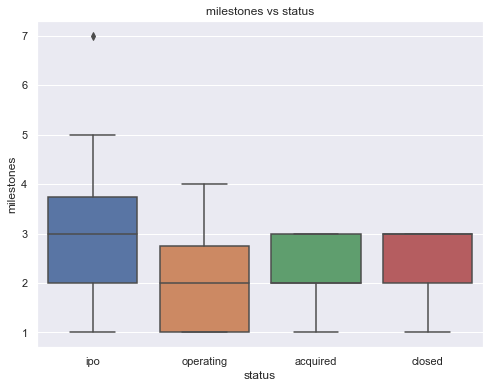

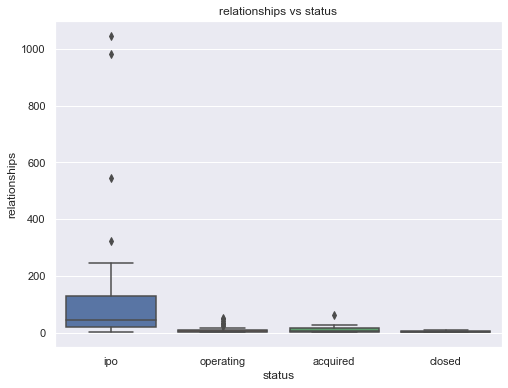

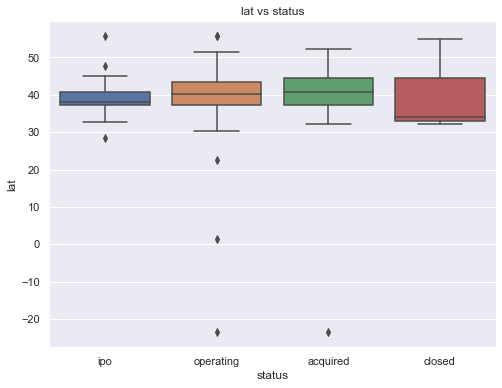

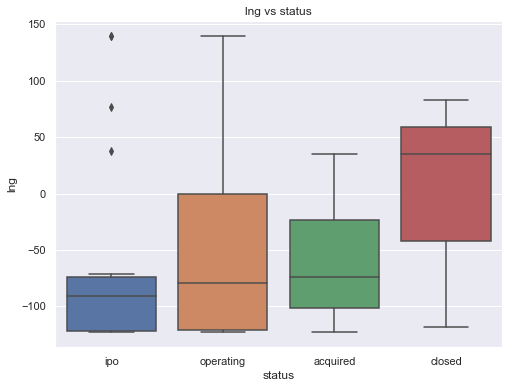

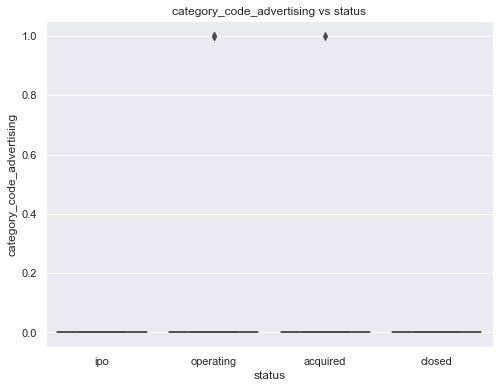

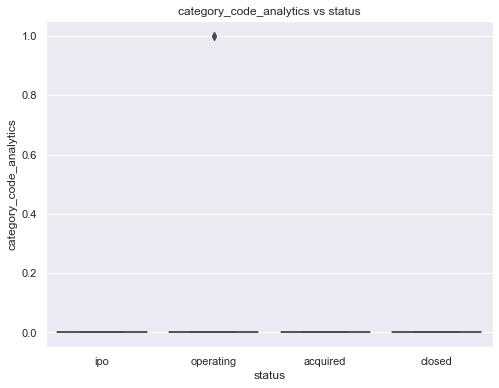

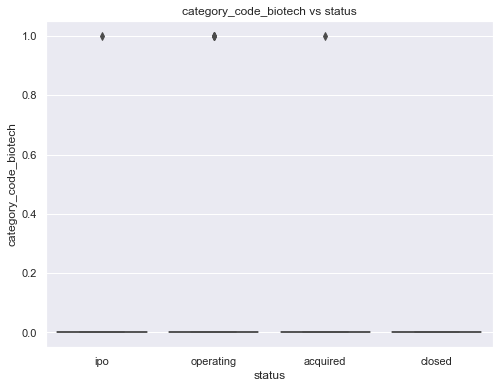

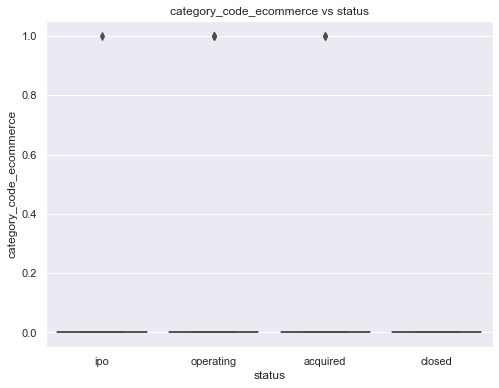

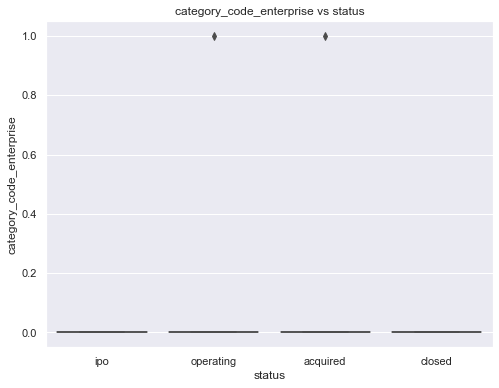

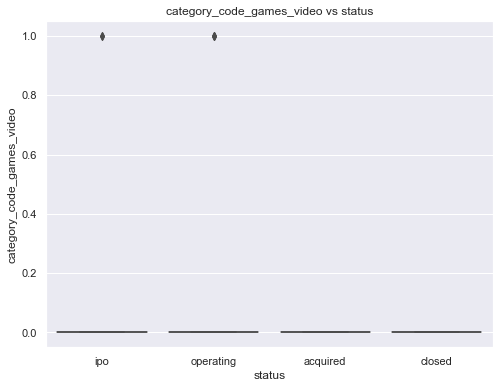

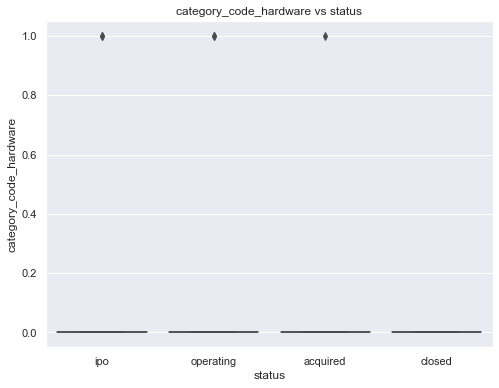

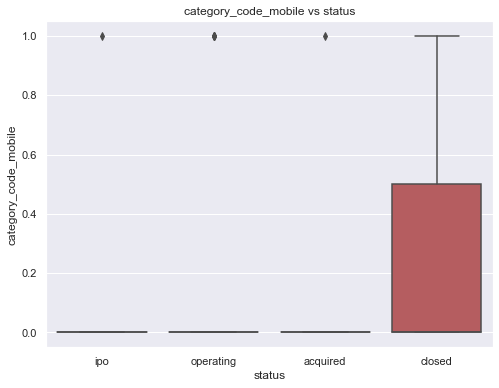

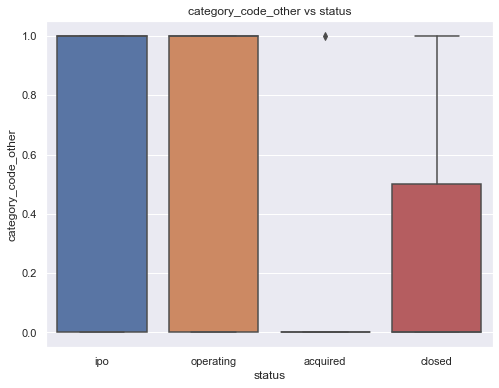

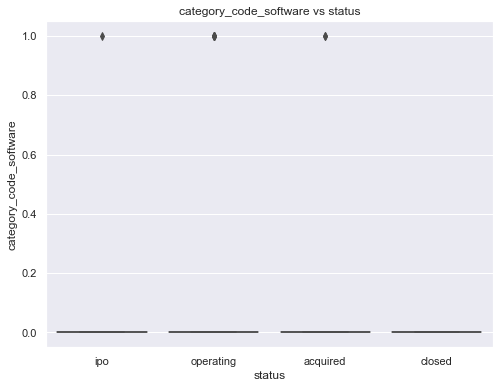

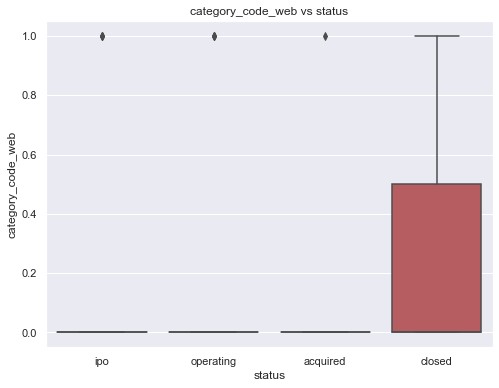

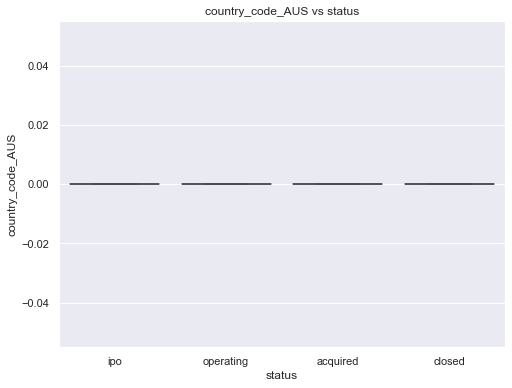

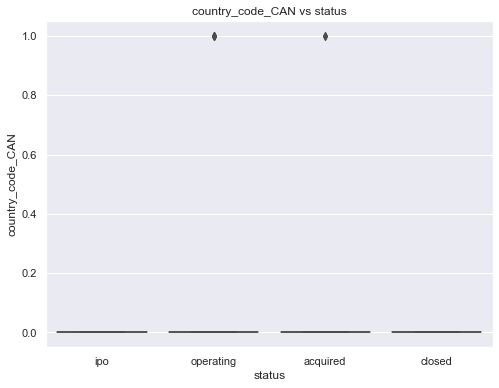

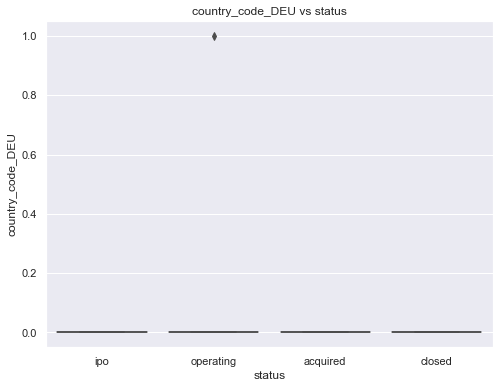

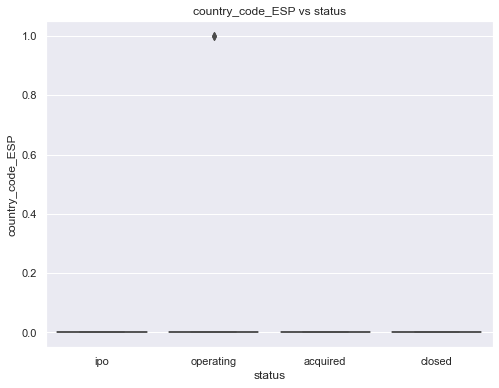

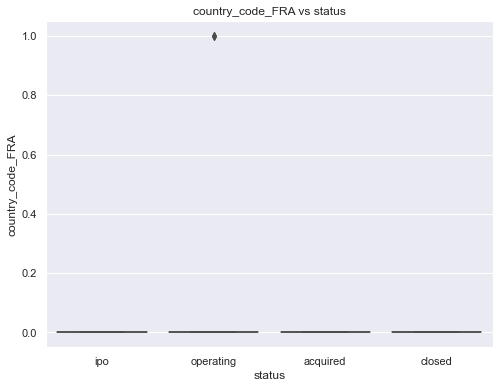

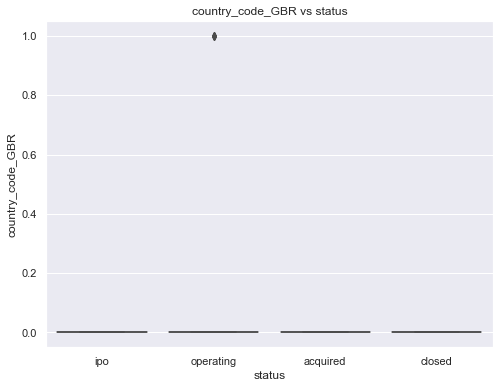

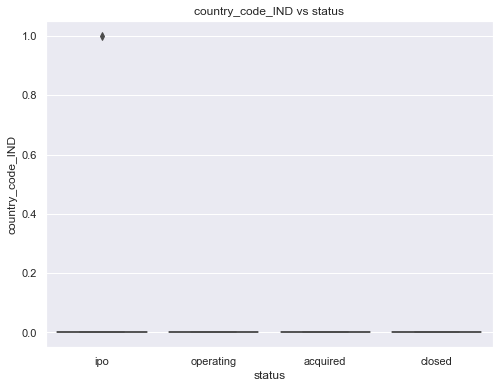

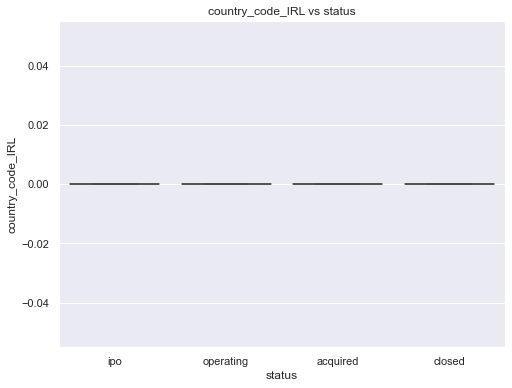

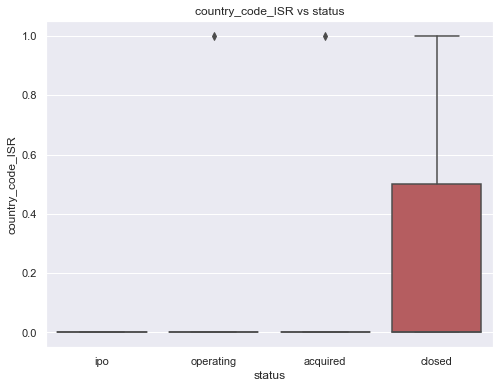

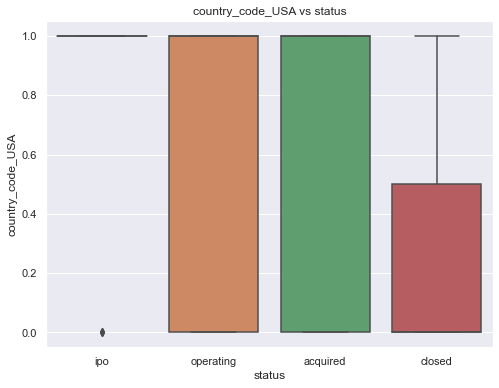

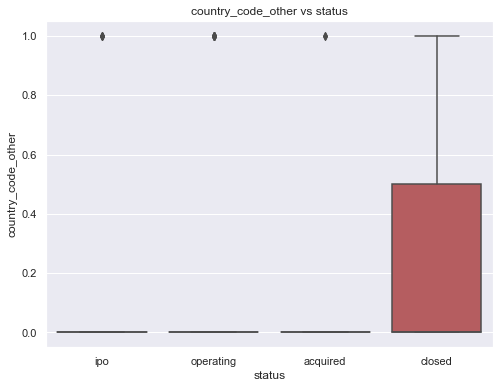

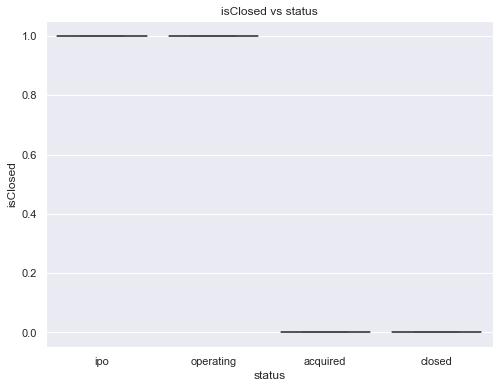

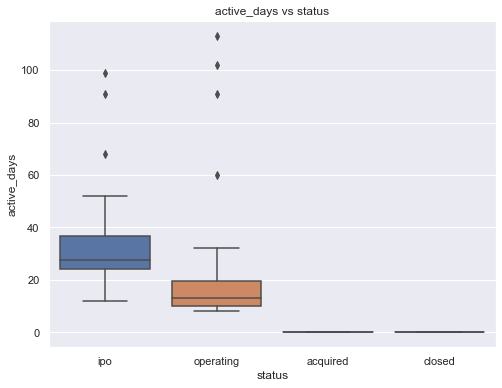

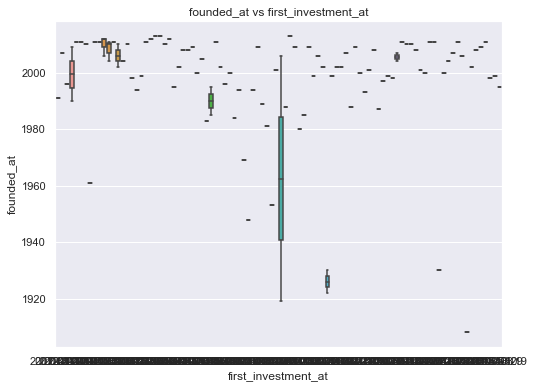

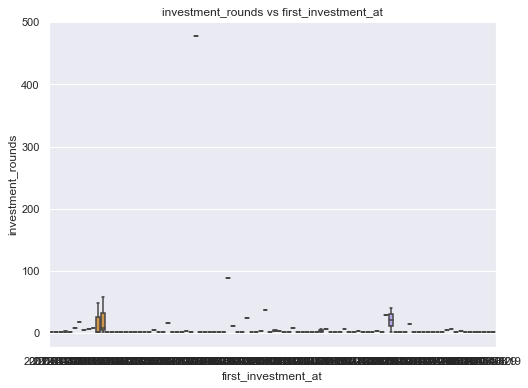

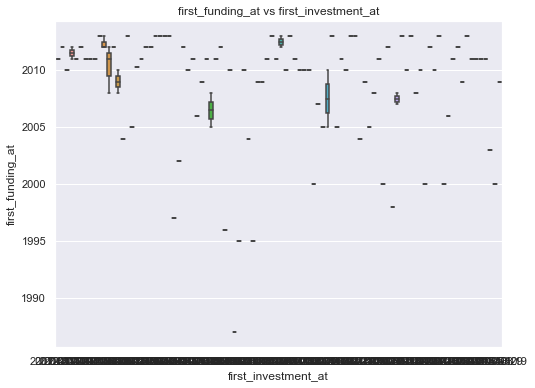

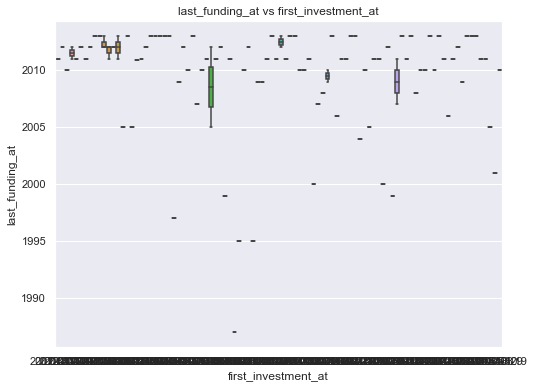

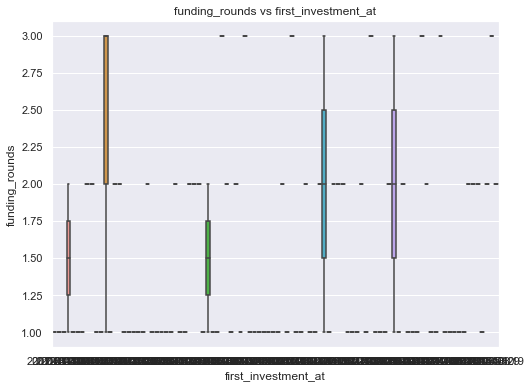

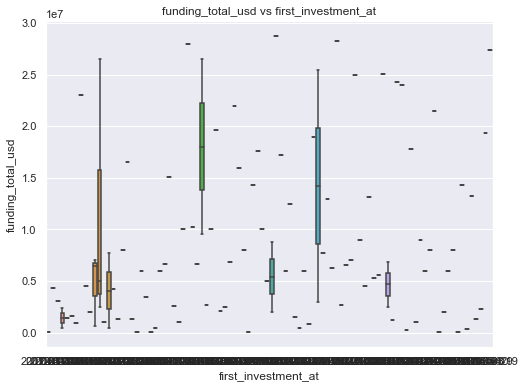

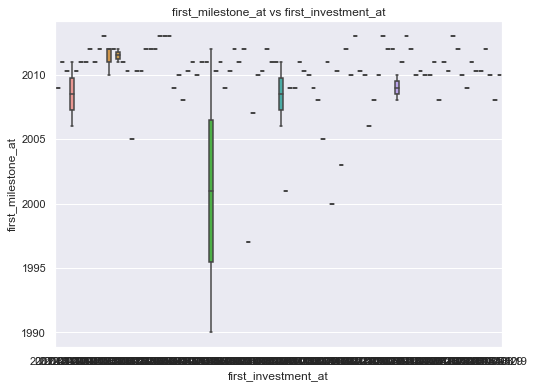

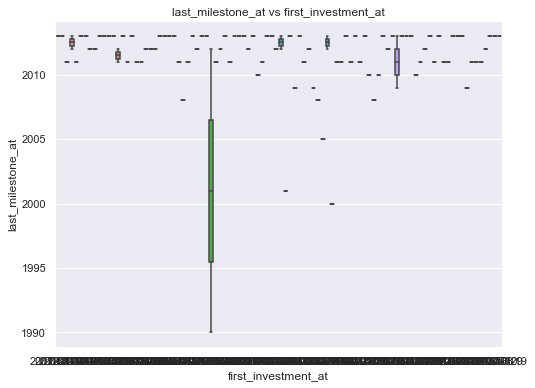

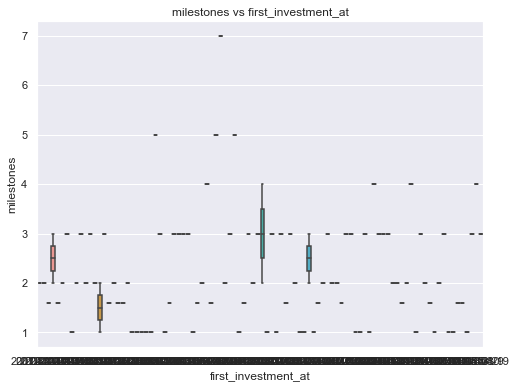

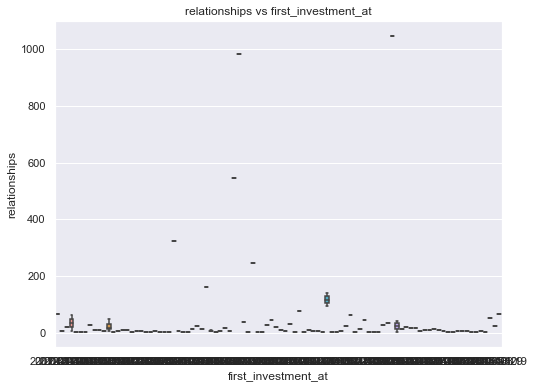

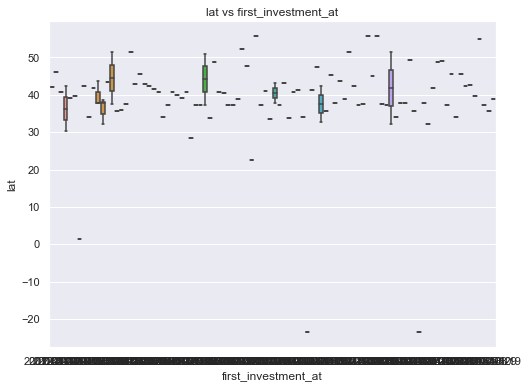

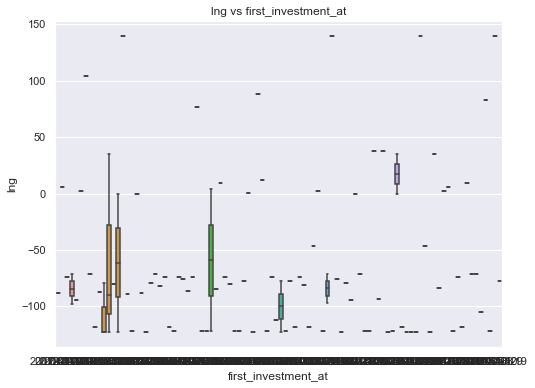

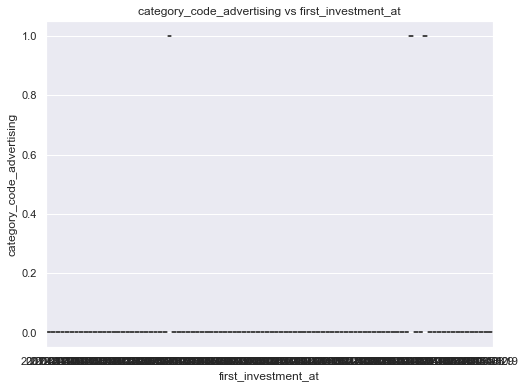

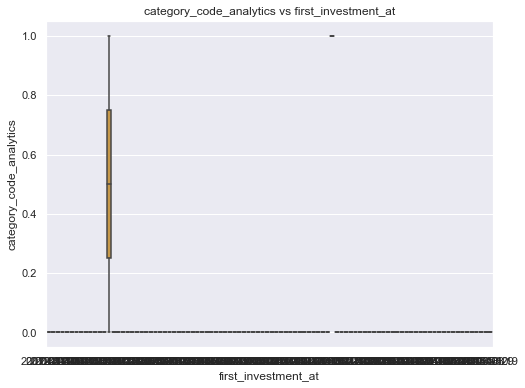

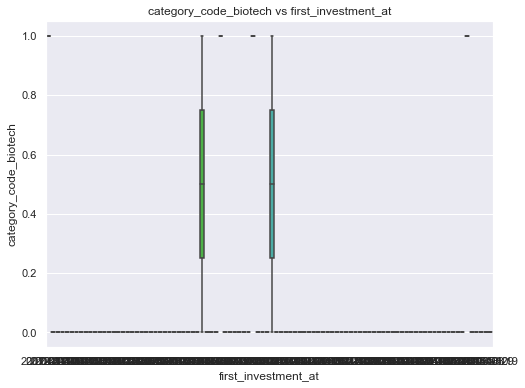

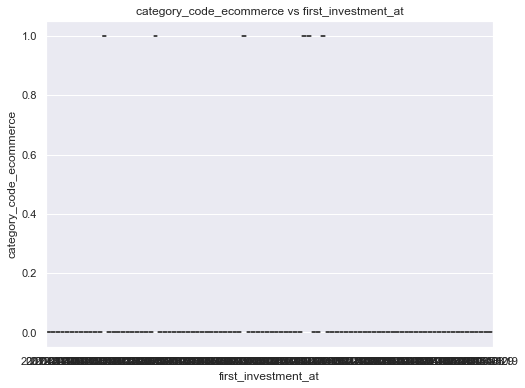

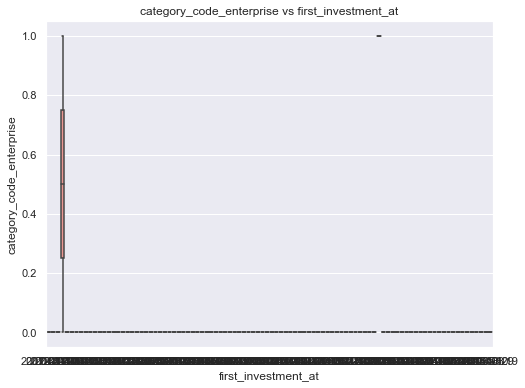

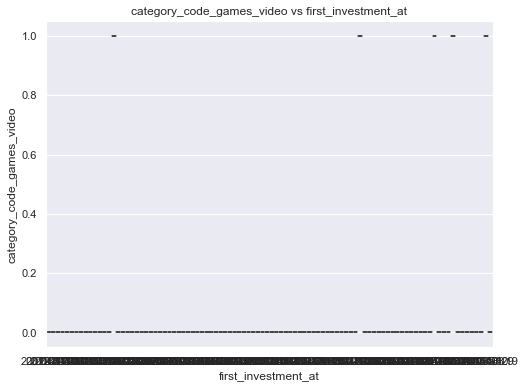

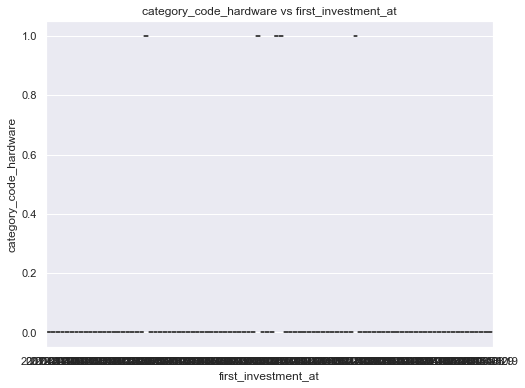

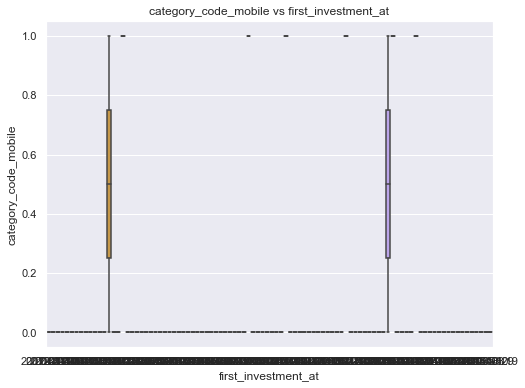

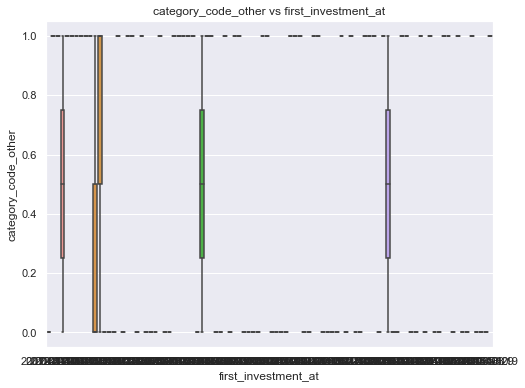

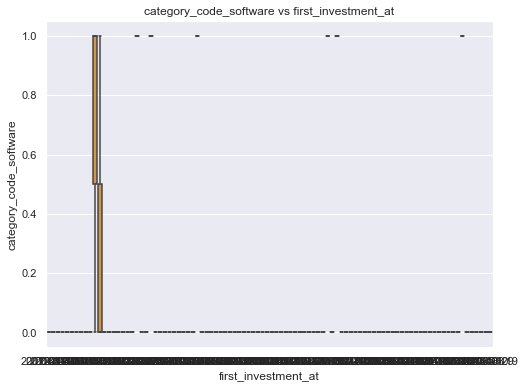

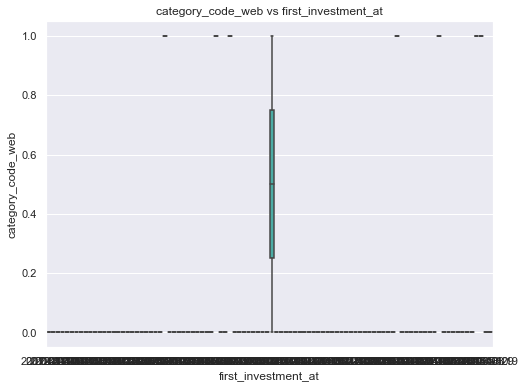

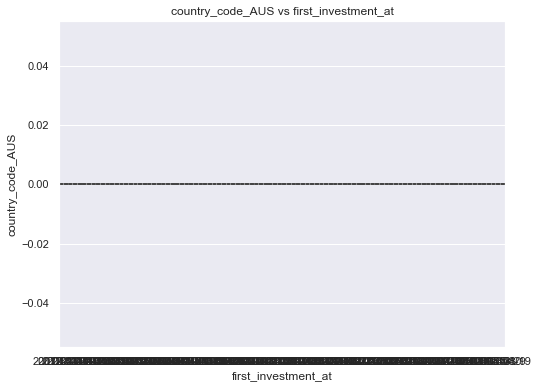

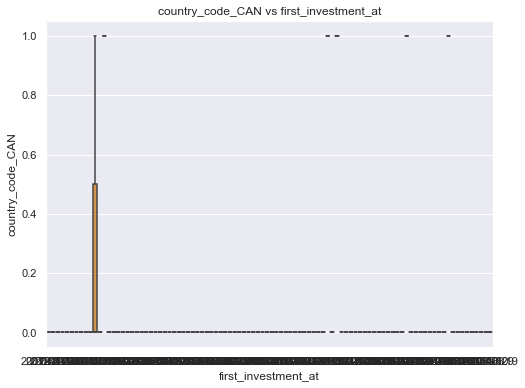

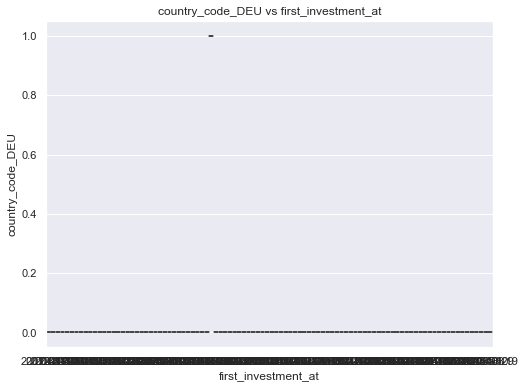

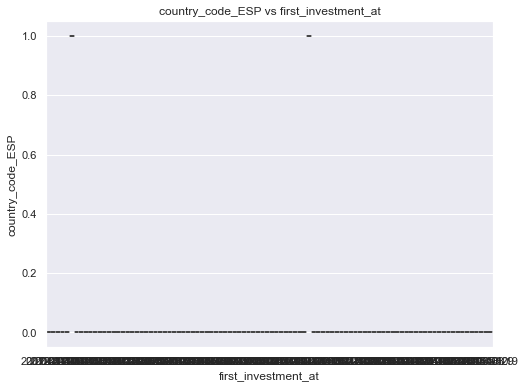

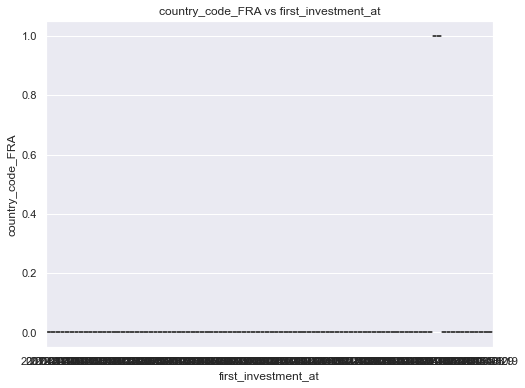

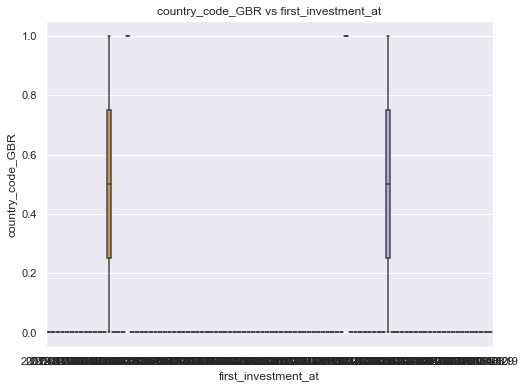

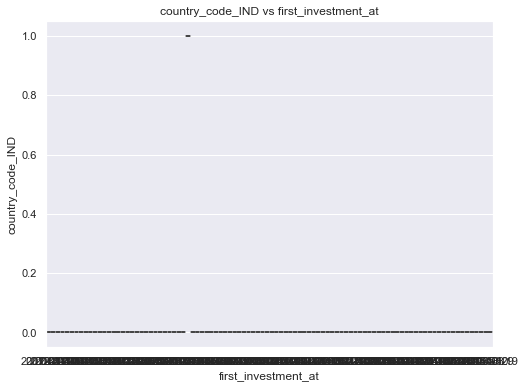

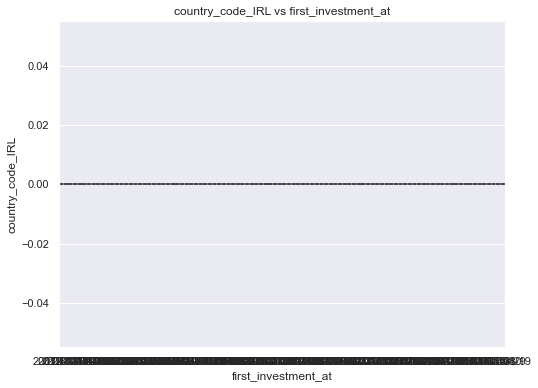

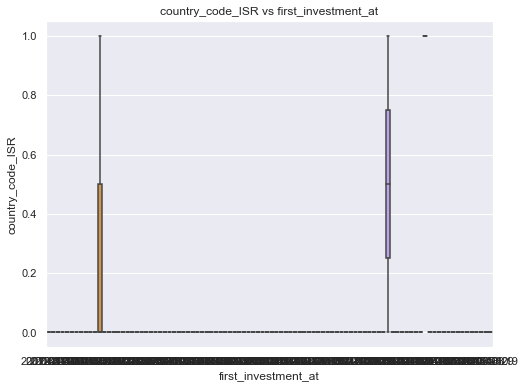

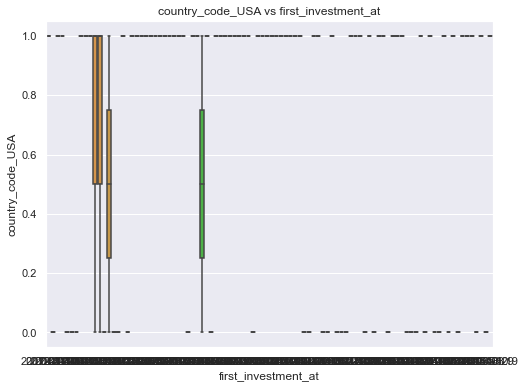

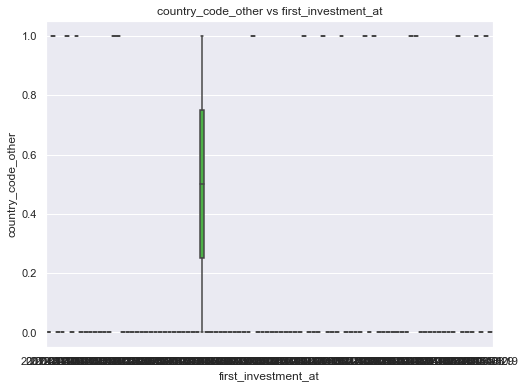

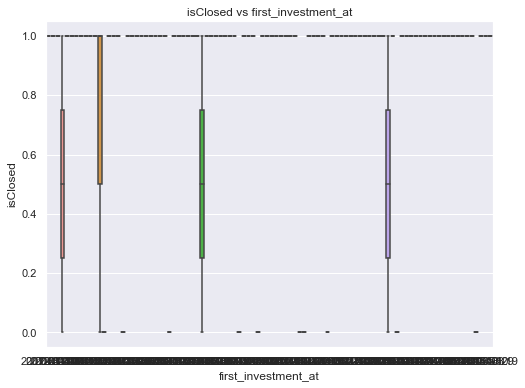

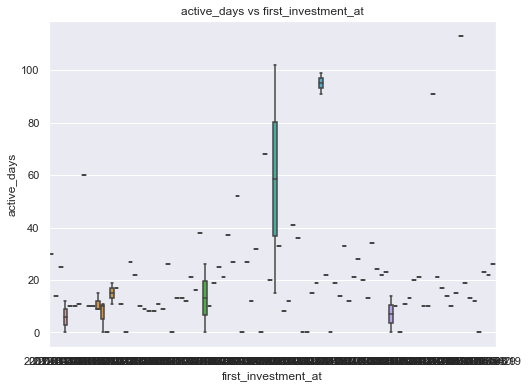

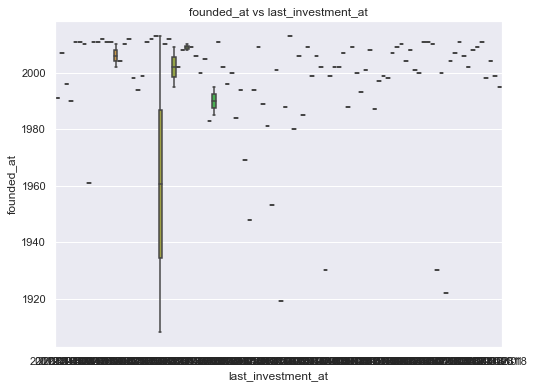

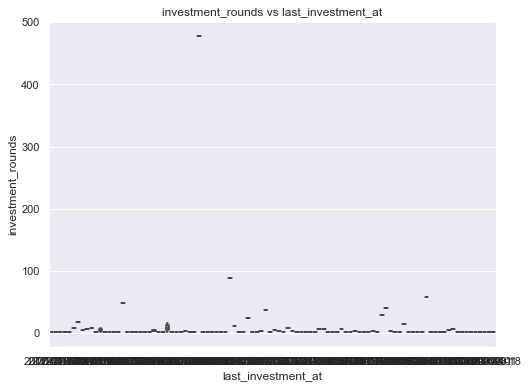

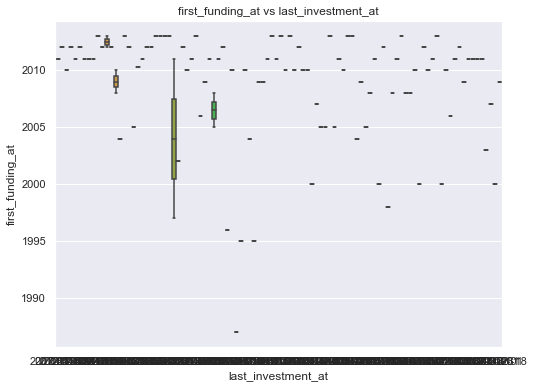

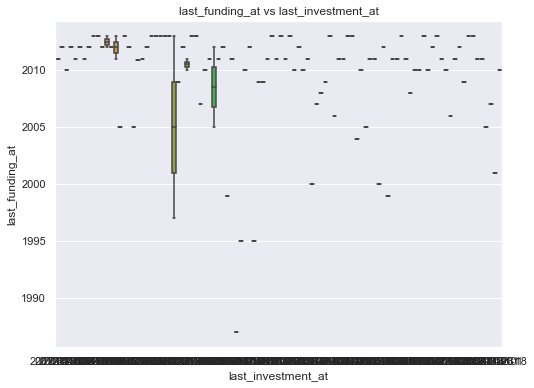

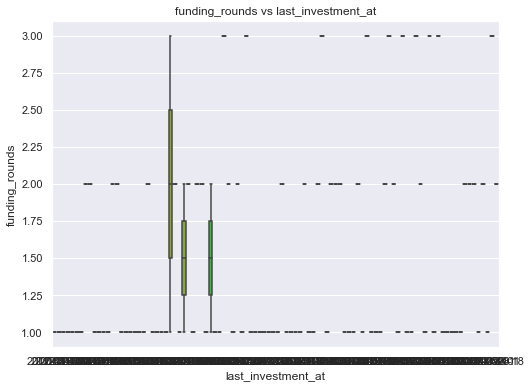

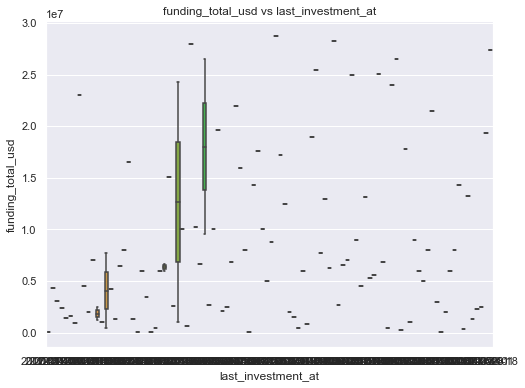

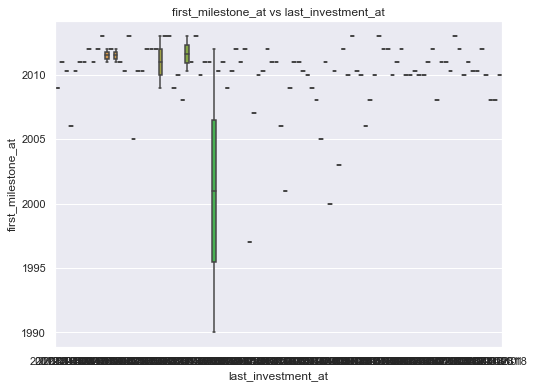

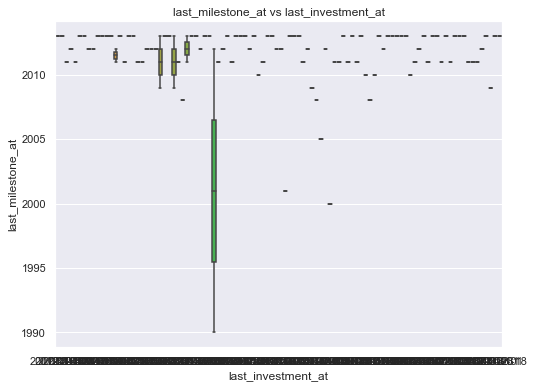

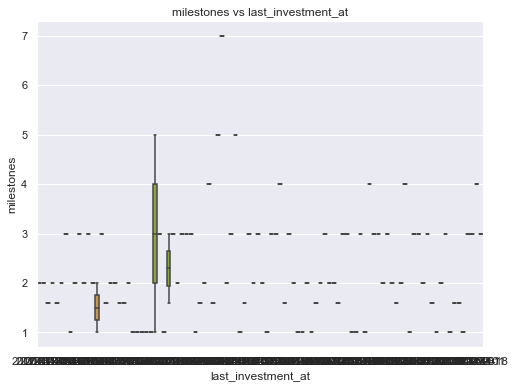

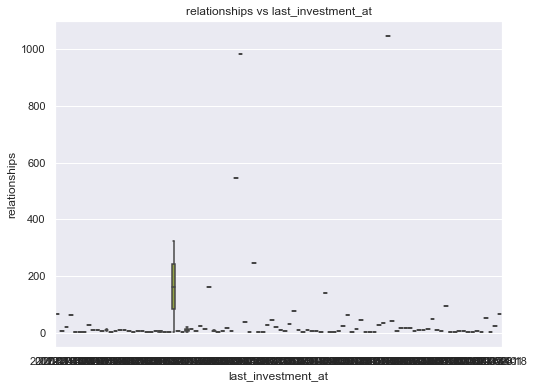

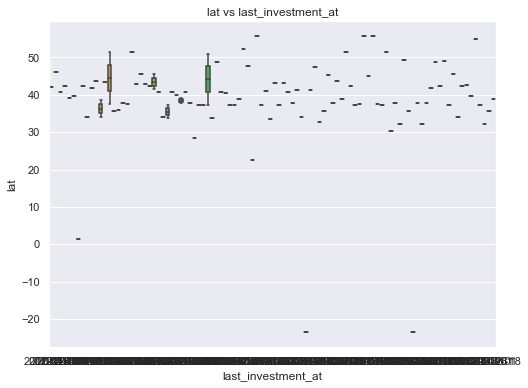

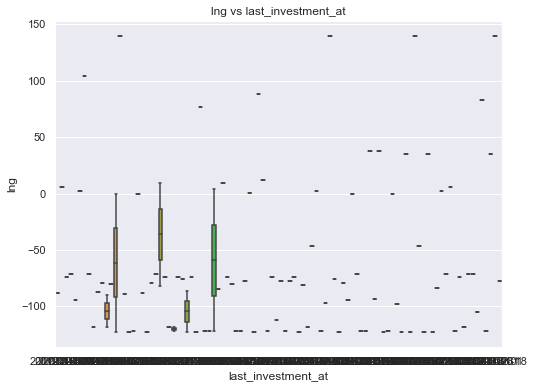

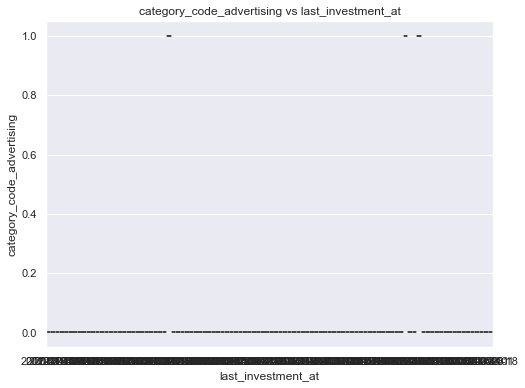

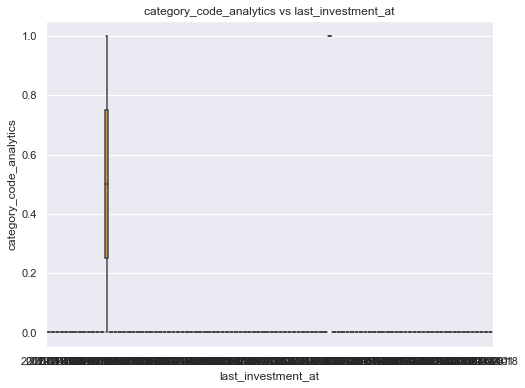

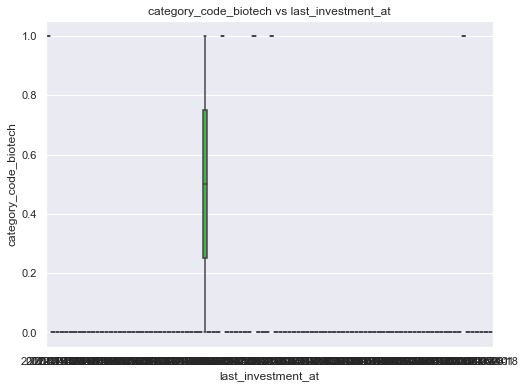

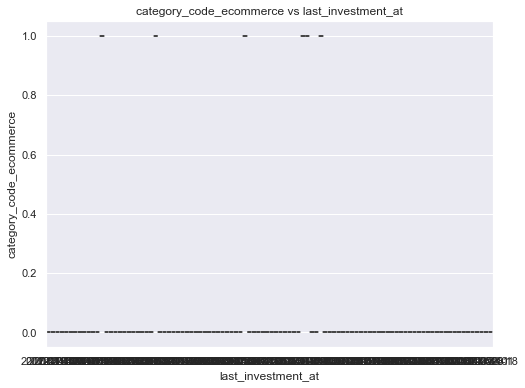

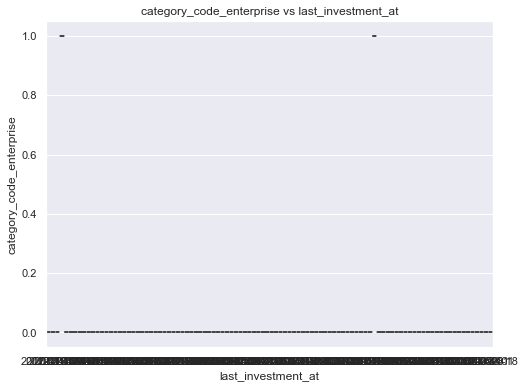

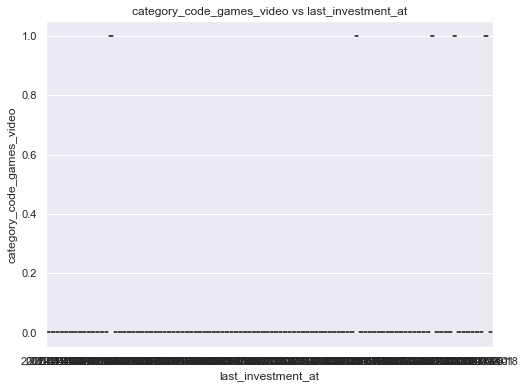

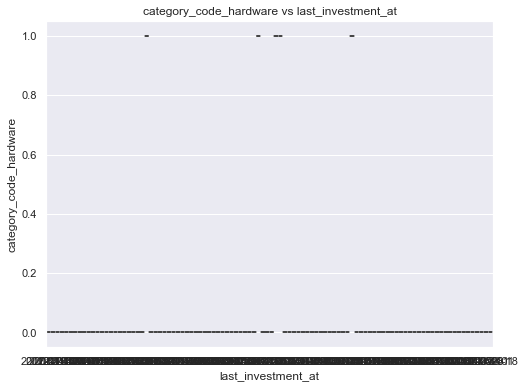

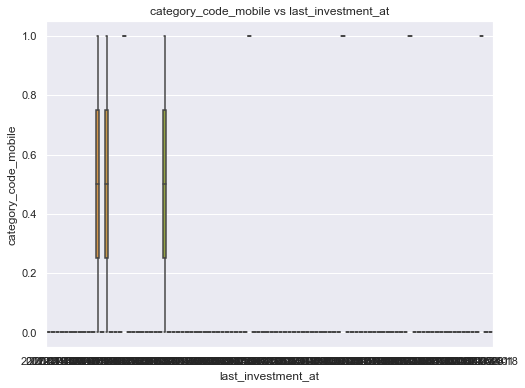

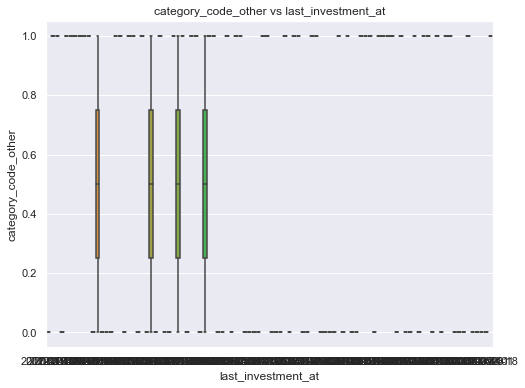

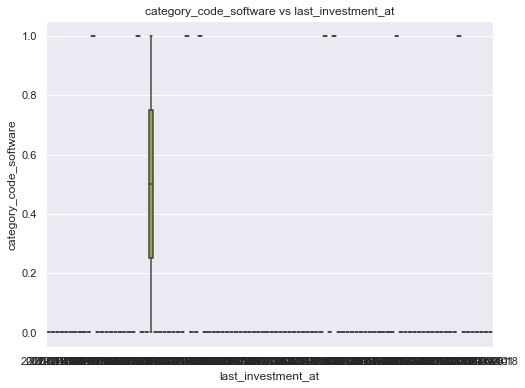

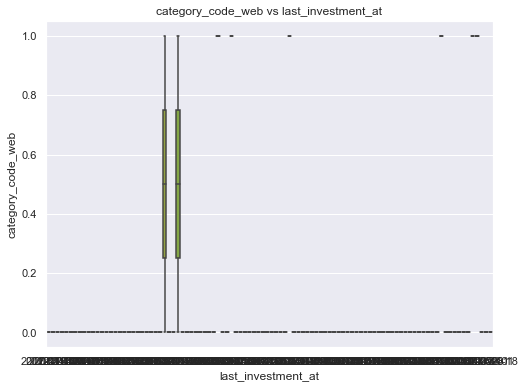

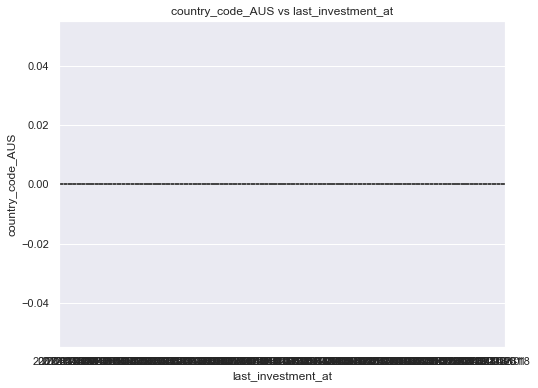

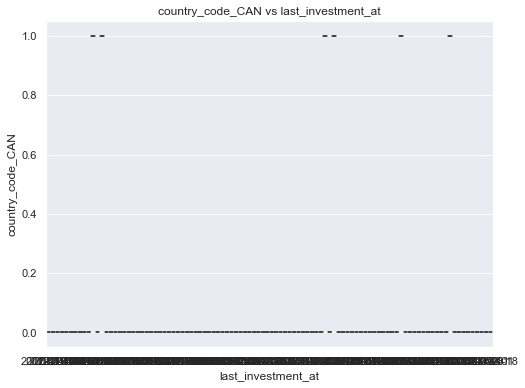

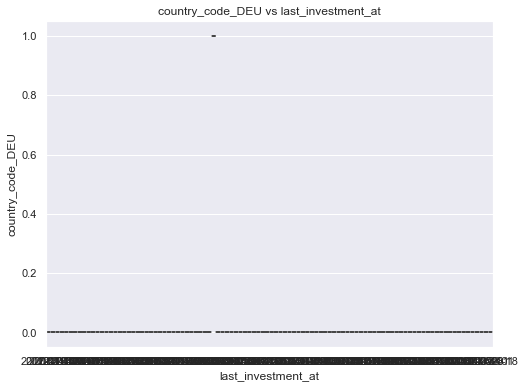

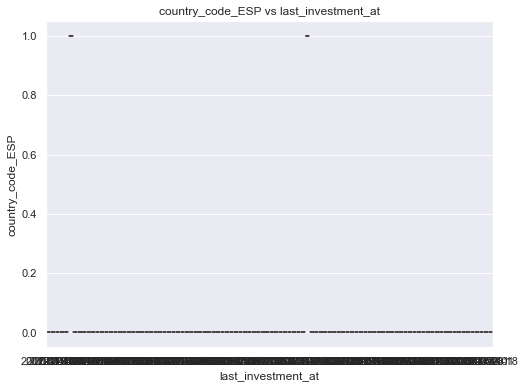

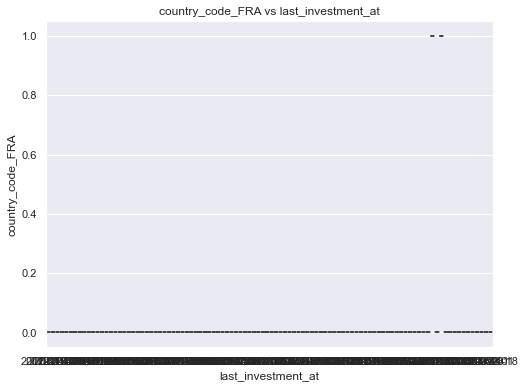

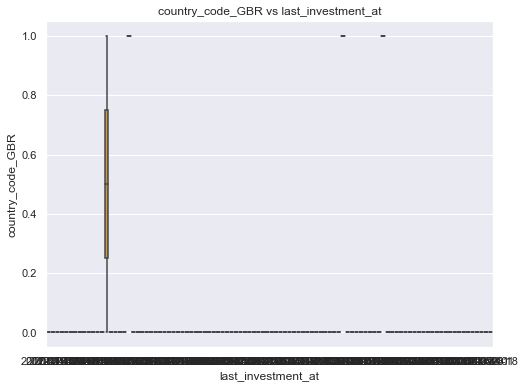

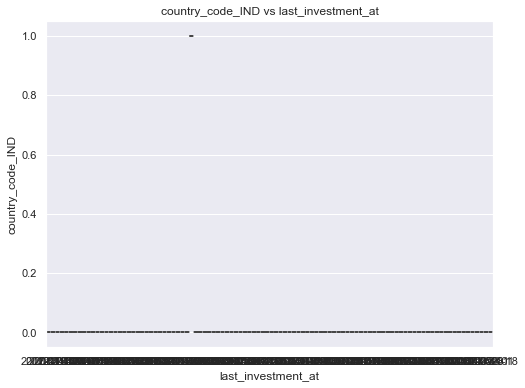

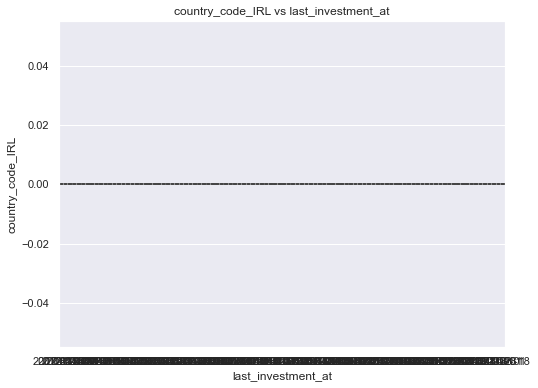

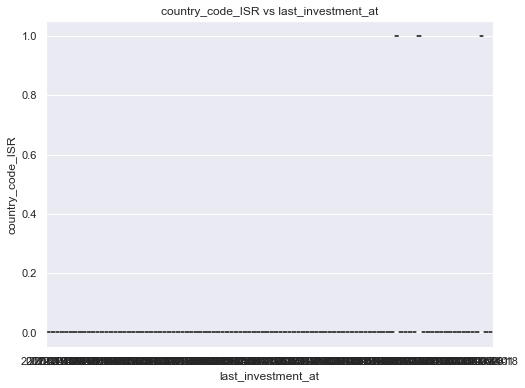

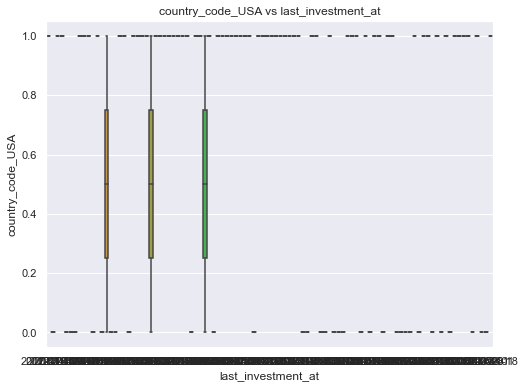

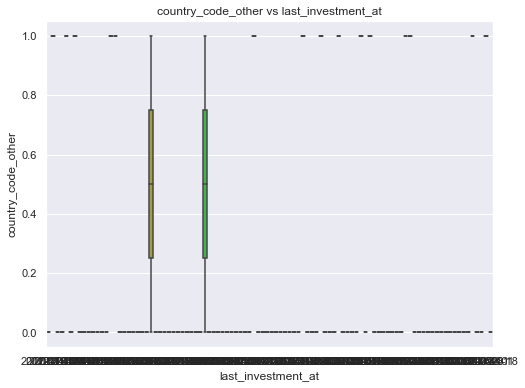

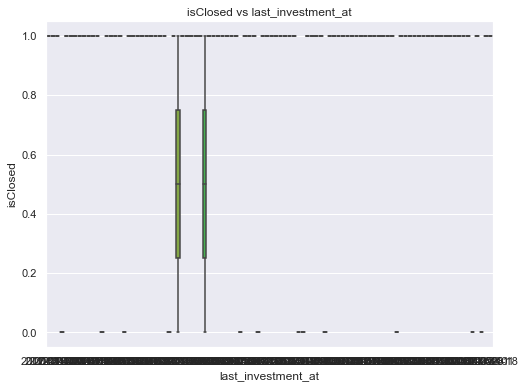

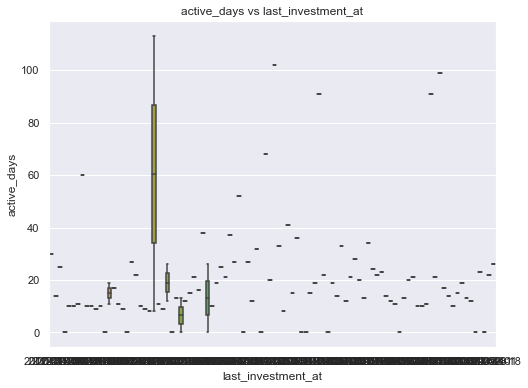

In [52]:
# Box plot for numerical vs categorical features
for cat_feature in categorical_features:
    for num_feature in numerical_features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=data[cat_feature], y=data[num_feature])
        plt.title(f'{num_feature} vs {cat_feature}')
        plt.show()


### Multivariate Data Analysis

Correlation Matrix and Heatmap

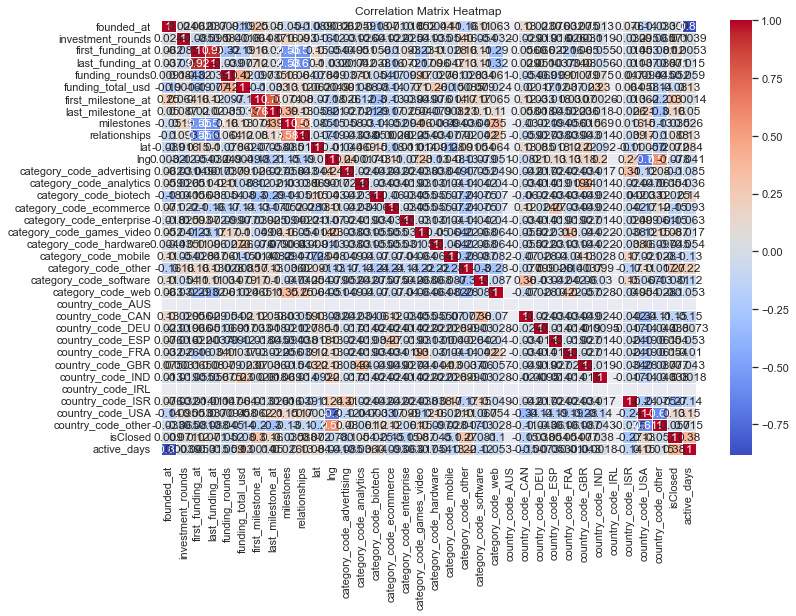

In [53]:
# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


Dimensionality Reduction (PCA: Principal Component Analysis)

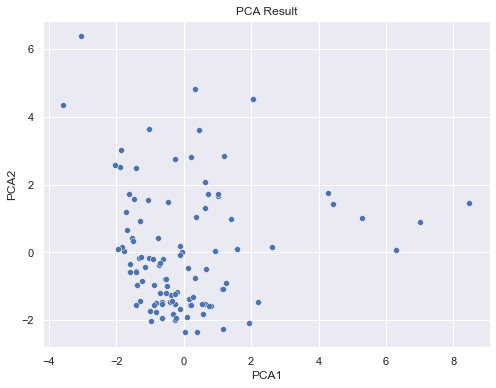

In [54]:
from sklearn.decomposition import PCA

# Standardizing the data before applying PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_features])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# Create a DataFrame for the PCA results
data_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

# Plot the PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=data_pca)
plt.title('PCA Result')
plt.show()


Exploring Interactions Using 3D Plot

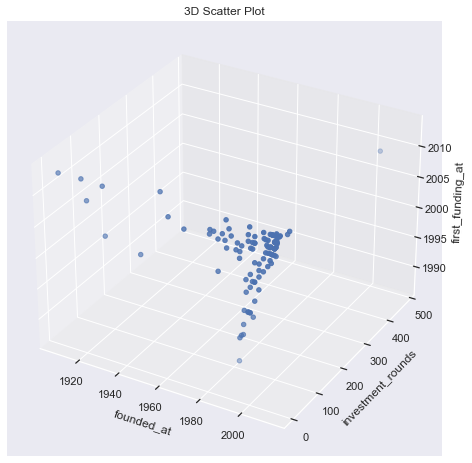

In [55]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter plot for the first 3 numerical features
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[numerical_features[0]], data[numerical_features[1]], data[numerical_features[2]])
ax.set_xlabel(numerical_features[0])
ax.set_ylabel(numerical_features[1])
ax.set_zlabel(numerical_features[2])
plt.title('3D Scatter Plot')
plt.show()


#### After analyzing the data, we can summarize the key insights:


1. Patterns observed in the distributions of numerical and categorical features.
2. Relationships between numerical features (e.g., strong positive/negative correlations).
3. Outliers identified in certain features and possible reasons.
4. PCA results showing that a significant amount of variance is captured by the first few components.

##### Based on the analysis, We may provide recommendations, such as:

1. Further cleaning or handling of outliers.
2. Feature engineering to create new variables.
3. Areas where additional data collection may be necessary.

## Feature Engineering Process:

##### 1. Understand the Domain and Problem Statement

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 897 to 196300
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     106 non-null    object 
 1   founded_at                 106 non-null    int64  
 2   first_investment_at        106 non-null    object 
 3   last_investment_at         106 non-null    object 
 4   investment_rounds          106 non-null    float64
 5   first_funding_at           106 non-null    float64
 6   last_funding_at            106 non-null    float64
 7   funding_rounds             106 non-null    float64
 8   funding_total_usd          106 non-null    float64
 9   first_milestone_at         106 non-null    float64
 10  last_milestone_at          106 non-null    float64
 11  milestones                 106 non-null    float64
 12  relationships              106 non-null    float64
 13  lat                        106 non-null    fl

In [57]:
data.head().transpose()

897         2324         4750        5052  \
status                            ipo   operating          ipo    acquired   
founded_at                       1991        2007         1996        1990   
first_investment_at        2007-01-30  2012-11-05   2008-04-24  2013-02-05   
last_investment_at         2007-11-27  2012-11-05   2008-04-24  2013-07-02   
investment_rounds                 2.0         1.0          1.0         2.0   
first_funding_at               2011.0      2012.0       2010.0      2012.0   
last_funding_at                2011.0      2012.0       2010.0      2012.0   
funding_rounds                    1.0         1.0          1.0         1.0   
funding_total_usd            100000.0   4300000.0    3100000.0   2400000.0   
first_milestone_at             2009.0      2011.0  2010.244007      2006.0   
last_milestone_at              2013.0      2013.0  2010.985875      2012.0   
milestones                        2.0         2.0     1.593753         2.0   
relationships                    66.0         7.0         21.0        63.0   
lat                         42.033362   46.204391    40.712775   42.360082   
lng                        -87.883399    6.143158   -74.005973   -71.05888   
category_code_advertising           0           0            0           0   
category_code_analytics             0           0            0           0   
category_code_biotech               1           0            0           0   
category_code_ecommerce             0           0            0           0   
category_code_enterprise            0           0            0           1   
category_code_games_video           0           0            0           0   
category_code_hardware              0           0            0           0   
category_code_mobile                0           0            0           0   
category_code_other                 0           1            1           0   
category_code_software              0           0            0           0   
category_code_web                   0           0            0           0   
country_code_AUS                    0           0            0           0   
country_code_CAN                    0           0            0           0   
country_code_DEU                    0           0            0           0   
country_code_ESP                    0           0            0           0   
country_code_FRA                    0           0            0           0   
country_code_GBR                    0           0            0           0   
country_code_IND                    0           0            0           0   
country_code_IRL                    0           0            0           0   
country_code_ISR                    0           0            0           0   
country_code_USA                    1           0            1           1   
country_code_other                  0           1            0           0   
isClosed                            1           1            1           0   
active_days                        30          14           25           0   

                                  7001  
status                       operating  
founded_at                        2011  
first_investment_at         2012-02-20  
last_investment_at          2012-02-20  
investment_rounds                  1.0  
first_funding_at                2011.0  
last_funding_at                 2011.0  
funding_rounds                     1.0  
funding_total_usd            1380700.0  
first_milestone_at         2010.244007  
last_milestone_at          2010.985875  
milestones                    1.593753  
relationships                      4.0  
lat                           39.08252  
lng                         -94.582306  
category_code_advertising            0  
category_code_analytics              0  
category_code_biotech                0  
category_code_ecommerce              0  
category_code_enterprise             0  
category_code_games_video            0  
category_c

#### Feature Selection
Now, we'll begin by selecting the relevant features. Features like category_code_*, country_code_*, isClosed, and status might be of interest, but others like lat, lng, and timestamps may be transformed.

In [58]:
import pandas as pd
import numpy as np

# Sample Data
data = {
    'status': ['ipo', 'operating', 'ipo', 'acquired', 'operating'],
    'founded_at': [1991, 2007, 1996, 1990, 2011],
    'first_investment_at': ['2007-01-30', '2012-11-05', '2008-04-24', '2013-02-05', '2012-02-20'],
    'investment_rounds': [2.0, 1.0, 1.0, 2.0, 1.0],
    'funding_total_usd': [100000.0, 4300000.0, 3100000.0, 2400000.0, 1380700.0],
    'relationships': [66.0, 7.0, 21.0, 63.0, 4.0],
    'category_code_biotech': [1, 0, 0, 0, 0],
    'category_code_other': [0, 1, 1, 0, 1],
    'country_code_USA': [1, 0, 1, 1, 0],
    'isClosed': [1, 1, 1, 0, 1],
    'active_days': [30, 14, 25, 0, 10]
}

df = pd.DataFrame(data)
df['first_investment_at'] = pd.to_datetime(df['first_investment_at'])  # Converting date columns


#### Create New Features

We can create new features like the time difference between the first investment and the founded year (investment_delay), or aggregate features like total funding.

In [59]:
# Creating a new feature - investment_delay (years from founded_at to first_investment_at)
df['investment_delay'] = (df['first_investment_at'].dt.year - df['founded_at'])

# Aggregating funding and investment rounds
df['funding_per_round'] = df['funding_total_usd'] / df['investment_rounds']


#### Feature Transformation

Here, we'll transform the funding_total_usd using log transformation to deal with skewness.

In [60]:
# Log transformation for skewed features
df['log_funding_total'] = np.log1p(df['funding_total_usd'])


#### Feature Scaling

Let's apply min-max scaling and standard scaling for features like investment_rounds, funding_total_usd, and relationships.

In [61]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Scaling
scaler = MinMaxScaler()
df[['scaled_investment_rounds', 'scaled_relationships']] = scaler.fit_transform(df[['investment_rounds', 'relationships']])

# Standard Scaling
std_scaler = StandardScaler()
df['standardized_funding_total'] = std_scaler.fit_transform(df[['funding_total_usd']])


#### Feature Reduction

Here, we might apply PCA if there are a lot of correlated numerical features, but with this dataset, we can reduce dimensionality by manually dropping less relevant features like lat, lng, or redundant category_code_* columns.

In [62]:
# Dropping some features (assuming they're irrelevant for now)
df_reduced = df.drop(columns=['category_code_biotech', 'category_code_other'])


##### Now here is final DataFrame

In [64]:
df.head()


status  founded_at first_investment_at  investment_rounds  \
0        ipo        1991          2007-01-30                2.0   
1  operating        2007          2012-11-05                1.0   
2        ipo        1996          2008-04-24                1.0   
3   acquired        1990          2013-02-05                2.0   
4  operating        2011          2012-02-20                1.0   

   funding_total_usd  relationships  category_code_biotech  \
0           100000.0           66.0                      1   
1          4300000.0            7.0                      0   
2          3100000.0           21.0                      0   
3          2400000.0           63.0                      0   
4          1380700.0            4.0                      0   

   category_code_other  country_code_USA  isClosed  active_days  \
0                    0                 1         1           30   
1                    1                 0         1           14   
2                    1                 1         1           25   
3                    0                 1         0            0   
4                    1                 0         1           10   

   investment_delay  funding_per_round  log_funding_total  \
0                16            50000.0          11.512935   
1                 5          4300000.0          15.274126   
2                12          3100000.0          14.946913   
3                23          1200000.0          14.690980   
4                 1          1380700.0          14.138102   

   scaled_investment_rounds  scaled_relationships  standardized_funding_total  
0                       1.0              1.000000                   -1.500398  
1                       0.0              0.048387                    1.422266  
2                       0.0              0.274194                    0.587219  
3                       1.0              0.951613                    0.100108  
4                       0.0              0.000000                   -0.609194

In [66]:
df.shape

(5, 17)